In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

sig500_file = "/cluster/home/amyrewoldt/21.2.48/allevents_sig500.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/allevents_sig600.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/allevents_sig700.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/allevents_sig800.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/allevents_sig1000.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/allevents_bkg.csv"


In [2]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#3 leptons or more, first highest pt lepton pt requirement > 30 GeV, 
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
#add DR, check lepton pt for bkg

In [3]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [4]:
#tagging signal as 1
for sig in range(len(df_sig)):
    df_sig[sig]["signal"] = 1
print(mass_points[0])
df_sig[0]

500GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,51223.647380,49251.446265,28772.078191,-0.604389,-0.590286,-1.522131,-1.171367,1.263686,1.743165,121224.054033,2.749121,13,13,13,-1,1,-1,1
1,39826.765666,15952.419812,15218.825956,0.864823,0.949562,0.020594,-2.339217,-0.678661,-3.136416,115638.399306,-2.166619,11,11,11,1,-1,-1,1
2,274797.911299,39735.110176,7039.623169,-0.897805,0.113978,-0.966409,-0.567885,1.749221,2.488326,272288.320000,2.486283,13,11,11,-1,-1,1,1
3,32568.389731,32098.862625,10218.660756,-0.316656,-0.182483,1.593944,1.774444,2.826042,1.018710,140401.657305,1.108781,13,13,11,1,-1,-1,1
4,53245.448242,19167.537509,15097.480063,0.261530,-0.882587,-0.029618,-1.996512,-1.156027,-2.433795,438740.170755,-1.581353,11,11,11,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7133,57836.754394,16358.954455,4373.053100,0.482224,0.357346,0.319647,-1.606272,-2.945775,1.896610,109680.134250,-2.011529,11,11,13,1,-1,1,1
7134,82267.948390,13332.932050,13259.130803,0.672945,1.256250,0.674485,1.870266,-1.958347,0.913560,103999.611290,-1.232817,11,11,11,1,1,-1,1
7135,158604.053425,13834.181300,10125.576113,-1.829530,-1.680148,-0.241562,-0.939448,-1.437208,-2.447974,232205.972976,-1.574854,11,11,11,1,-1,1,1
7136,50689.739645,18812.107033,2813.437709,1.897929,1.802774,2.832193,-0.268911,3.018290,1.636812,216233.959987,2.849600,11,11,11,-1,-1,1,1


In [5]:
print(mass_points[1])
df_sig[1]

600GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,40595.999310,39750.354045,15250.675427,1.326112,0.886603,-0.219798,-0.864481,-1.483945,1.297276,201210.741132,1.847213,13,13,11,-1,1,-1,1
1,110034.655358,11422.031686,10805.727139,-0.373328,1.010955,-0.050813,-1.002898,-1.116272,2.263410,160849.766181,2.754525,13,13,11,1,-1,-1,1
2,48669.005122,17847.509185,8520.265596,1.107274,-0.875573,2.768779,-0.798125,1.162552,-1.943499,62719.377616,1.068376,11,11,11,-1,1,1,1
3,32769.991936,23496.607850,22907.861155,0.752404,0.959222,0.403958,0.224076,-2.233344,2.823286,226188.219646,-1.338330,13,11,11,-1,1,-1,1
4,53309.858509,18758.987951,14507.044974,-1.421754,-1.015816,-0.888677,0.534228,-0.503952,-2.463226,47716.414071,1.104717,11,11,13,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,143981.659602,38130.973385,14835.515830,0.146273,-0.141710,0.172899,0.719989,3.114103,0.393105,426682.882061,-0.228300,11,13,11,-1,-1,1,1
7409,88187.530671,19167.276534,3791.188281,1.385122,0.398105,0.278529,0.904067,0.487589,2.751402,150487.917791,-2.948070,13,13,11,1,-1,-1,1
7410,132506.654048,17082.925361,3796.076589,-1.402104,-0.581818,-0.937953,-2.684313,0.373465,-2.166674,114975.334022,0.185107,11,11,11,1,1,-1,1
7411,70621.578518,28781.280710,4432.657138,2.203474,1.554724,2.264016,-0.935489,1.135761,2.999228,256875.354657,1.223061,11,11,11,1,1,-1,1


In [6]:
print(mass_points[2])
df_sig[2]

700GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,59398.268813,52080.897572,24280.246621,1.216915,0.837849,1.068519,1.492895,1.159045,-2.304250,47048.428632,-1.266599,13,13,11,-1,1,1,1
1,52813.199459,41332.383305,15265.190440,1.429294,0.681805,-0.799011,-2.349729,-0.422135,1.552783,376131.857547,1.578773,13,11,11,1,1,-1,1
2,49743.909683,14142.992266,10284.098292,0.038824,1.466416,-0.319358,-2.726589,3.109552,0.466893,85548.325291,0.864717,13,13,11,1,-1,-1,1
3,82892.863514,18615.944179,7237.325608,0.007755,0.800498,0.743747,-0.803388,-1.027377,2.795829,80468.561319,2.969760,11,11,11,1,-1,1,1
4,137770.140924,9285.070617,7887.259582,-0.126232,-0.149352,-1.433635,-1.471966,-0.322366,0.338983,57347.959122,-0.356028,11,11,11,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,109513.153944,15333.170815,2373.974265,-0.393545,0.108597,0.506335,1.850366,1.914329,-0.920069,290844.136183,1.134201,11,11,11,-1,1,-1,1
7691,80447.209516,74078.166217,22090.836406,0.636623,1.028542,1.590562,1.347349,1.085714,-2.619996,79010.004602,-2.721410,13,13,11,-1,1,1,1
7692,109619.111624,16415.076930,11539.213866,0.933246,0.537020,0.529035,1.329526,-0.714104,1.384739,180261.118369,-1.930742,11,13,11,1,1,-1,1
7693,72069.752838,57949.595039,10465.393096,0.444836,0.615894,-0.023391,2.330814,-3.099256,-0.775181,49125.167072,-0.748634,13,13,11,1,-1,1,1


In [7]:
print(mass_points[3])
df_sig[3]

800GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,136034.546132,15946.349741,10098.030800,-0.614244,-1.669962,-0.927611,2.890116,0.171325,-1.701491,123768.832076,0.795463,11,11,11,1,1,-1,1
1,81590.973653,15342.552200,5004.168957,-0.040768,0.759685,-1.458187,-2.038976,-2.085293,0.974414,190778.456166,1.366805,11,11,11,-1,1,-1,1
2,32642.536159,24142.879938,12325.398250,-0.136986,0.939391,1.317908,-1.047662,-1.588286,1.983586,78533.745330,-0.470501,11,11,11,-1,1,-1,1
3,58125.163709,47247.979479,10958.887806,0.713574,-1.388995,0.968815,3.072501,0.334295,-2.095577,64799.181452,1.897190,11,13,11,1,-1,-1,1
4,45272.647424,32763.597742,2575.642651,0.521707,0.698130,-1.304035,2.763994,-0.261358,1.494991,277710.566188,-0.277922,11,11,11,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,105238.017161,5086.408890,975.069575,-0.797600,-1.995695,-0.724906,-1.653885,-1.412610,0.153791,145219.672995,3.008421,11,11,11,-1,1,-1,1
7915,164494.548648,24622.120561,5645.133503,-0.473669,-0.675226,0.525978,2.315153,-0.208446,-1.912509,358186.262669,-0.025306,11,11,11,1,1,-1,1
7916,188242.360868,3932.680822,2706.965077,-0.284036,-0.978783,2.288501,-0.165836,0.044499,3.021078,130948.174366,1.502323,11,11,11,-1,1,-1,1
7917,92951.385865,26210.345261,3643.370917,0.226185,0.269603,-0.010959,-0.319093,2.407941,0.148305,87242.125644,2.308544,11,11,11,1,-1,-1,1


In [8]:
print(mass_points[4])
df_sig[4]

1000GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,98576.724587,25674.612240,10602.174408,0.191996,-1.503722,-0.258677,-1.111119,2.096135,-1.604464,222335.313416,2.497258,11,11,11,-1,1,1,1
1,82464.071225,28947.884183,23151.816726,-0.064528,2.862874,1.204379,1.680686,0.115601,-2.119302,53720.729103,-1.619044,11,13,11,-1,-1,1,1
2,108483.677197,29396.799862,8926.378163,1.116945,1.100163,0.653512,3.049692,0.357119,0.727041,51696.596681,-0.116961,11,11,11,-1,1,1,1
3,96822.701807,27903.019629,6945.558541,-0.951469,0.724645,2.828476,2.646576,-0.156967,2.423032,251946.239305,0.447361,11,11,11,-1,1,-1,1
4,160783.020718,109158.295565,23709.593826,1.179038,0.138912,-0.372560,-0.763270,1.317160,1.545973,153227.432475,-0.610747,11,13,11,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,117982.751817,17057.961721,8014.237526,0.840886,0.788358,0.176408,-0.215438,-0.462545,2.676278,81810.038080,-1.722863,11,11,11,1,-1,-1,1
8275,196549.976920,37881.976444,16156.436583,0.925511,0.597709,1.292186,1.473693,1.264667,-1.626840,349421.898467,2.077896,13,13,13,1,-1,-1,1
8276,42727.668171,33175.606619,24566.493562,0.212280,-1.023118,0.405083,-2.773519,-2.505480,0.749270,205875.831621,0.582451,13,13,11,1,-1,1,1
8277,99953.534029,16814.031762,6012.117792,0.969965,0.708141,-1.808878,-1.359900,-0.656165,0.812108,377024.624149,-0.037109,11,11,11,1,-1,1,1


In [9]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,60432.759206,1772.358160,159.131793,0.138424,0.075263,0.077342,2.575995,0.972738,0.949069,80650.155730,1.606551,13,11,11,1,-1,1,0
1,114977.920099,134.964779,36.187926,-1.523502,-5.123272,-5.141090,-1.039730,1.693699,1.697745,31730.719436,-0.569189,11,11,11,-1,1,-1,0
2,74073.895915,166.976275,95.919963,0.319539,0.923414,0.742593,-0.594181,0.105200,-0.050175,24368.822529,-2.484182,13,11,11,1,1,-1,0
3,50060.002820,4525.579193,335.746157,0.792675,-0.967320,-2.225670,2.920075,0.348961,2.350332,15714.489978,-0.298547,11,11,13,1,-1,1,0
4,89223.831009,71299.461745,48.297105,-0.658649,0.935543,-4.971237,-2.553433,-0.033140,0.815127,88039.969330,1.992143,11,11,11,1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31874,32183.227510,3293.437026,71.744839,1.555806,2.382182,8.166670,1.352504,0.784537,0.909305,86891.791081,3.054422,11,13,11,1,-1,-1,0
31875,85452.524343,2531.264571,1677.046119,-1.483099,-0.103916,-0.112697,-0.791903,2.764265,2.779897,21603.180035,-2.916081,11,11,11,1,-1,1,0
31876,51448.649448,28299.548391,6492.247470,-0.083772,0.345898,-0.104237,-1.643386,-0.207850,-0.077490,61243.067061,-2.880351,11,13,13,1,-1,1,0
31877,52121.930545,5346.641808,2660.773115,-1.058905,-0.713249,-0.053451,-2.065351,0.341426,1.743748,27494.981817,-3.131909,11,13,13,-1,1,-1,0


500GeV
lepton1_pt


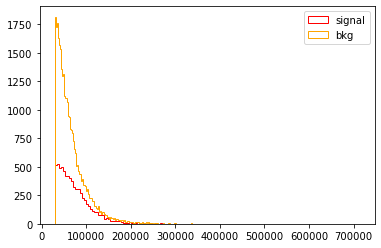

500GeV
lepton2_pt


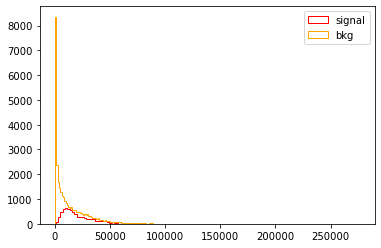

500GeV
lepton3_pt


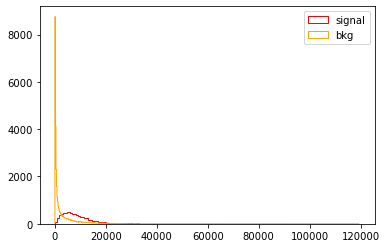

500GeV
lepton1_eta


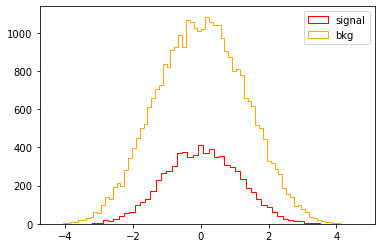

500GeV
lepton2_eta


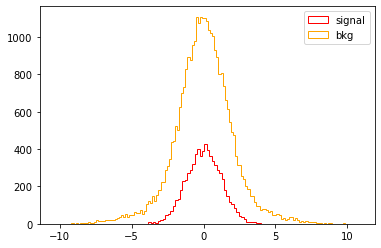

500GeV
lepton3_eta


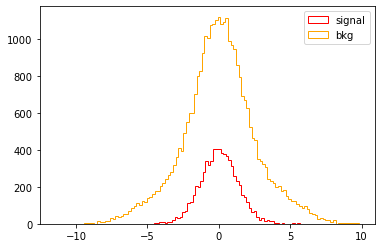

500GeV
lepton1_phi


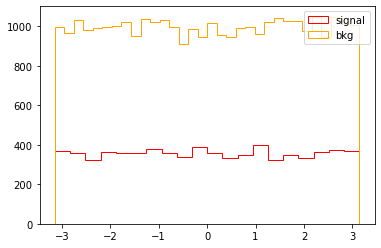

500GeV
lepton2_phi


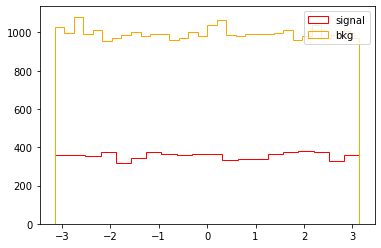

500GeV
lepton3_phi


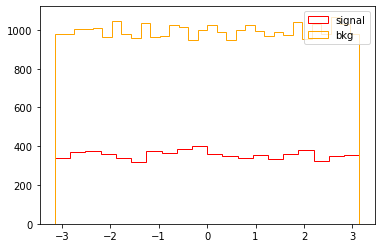

500GeV
MET


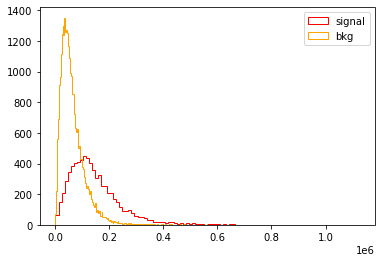

500GeV
MET_phi


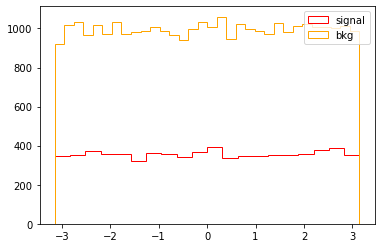

500GeV
lepton1_flavor


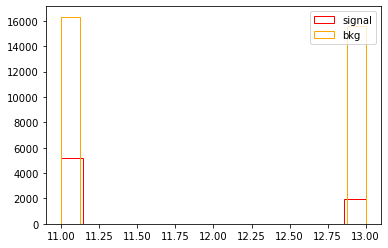

500GeV
lepton2_flavor


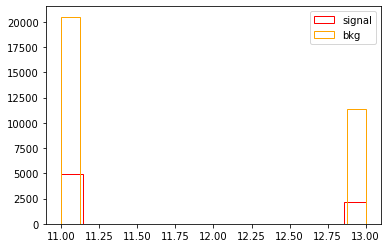

500GeV
lepton3_flavor


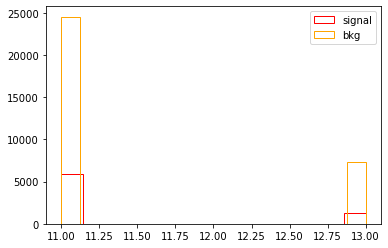

500GeV
lepton1_charge


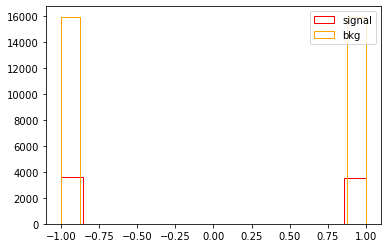

500GeV
lepton2_charge


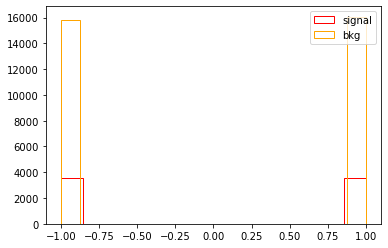

500GeV
lepton3_charge


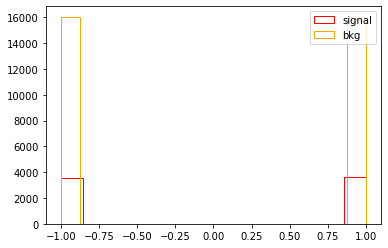

500GeV
signal


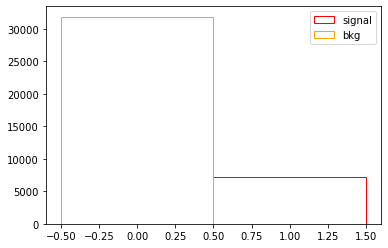

600GeV
lepton1_pt


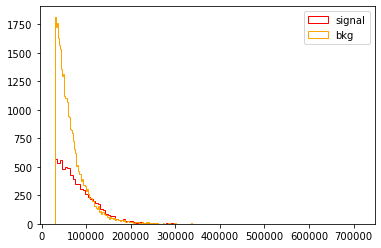

600GeV
lepton2_pt


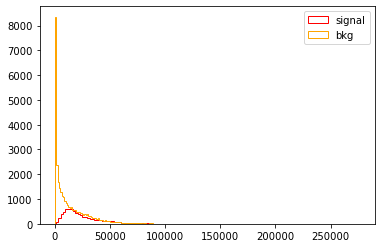

600GeV
lepton3_pt


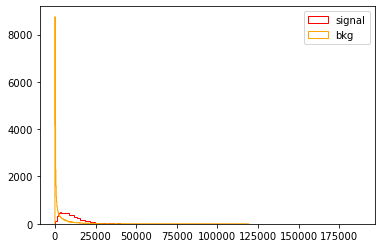

600GeV
lepton1_eta


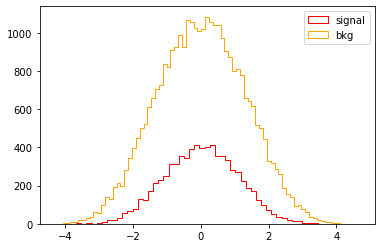

600GeV
lepton2_eta


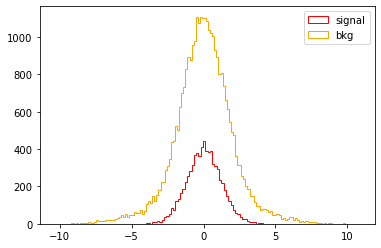

600GeV
lepton3_eta


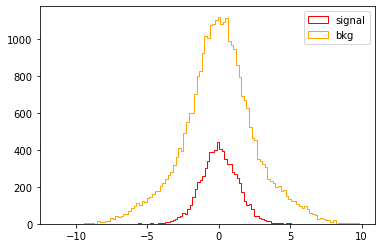

600GeV
lepton1_phi


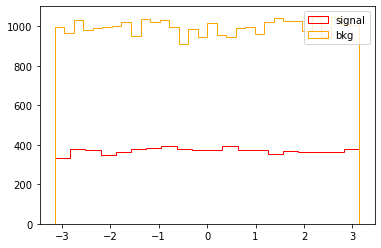

600GeV
lepton2_phi


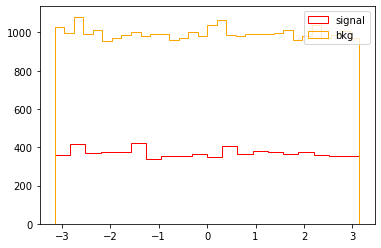

600GeV
lepton3_phi


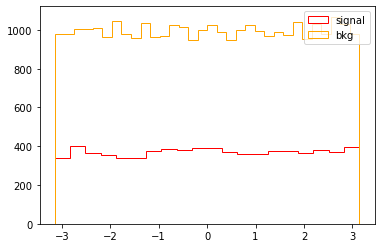

600GeV
MET


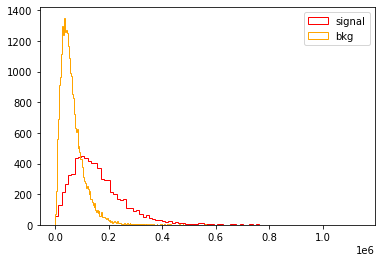

600GeV
MET_phi


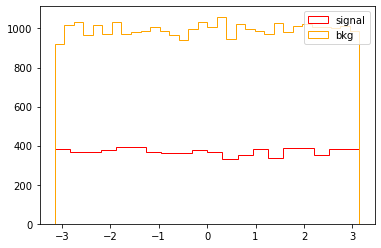

600GeV
lepton1_flavor


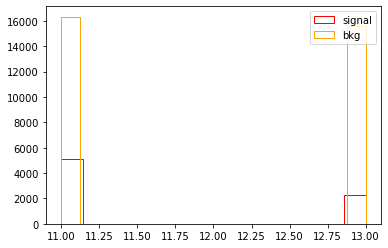

600GeV
lepton2_flavor


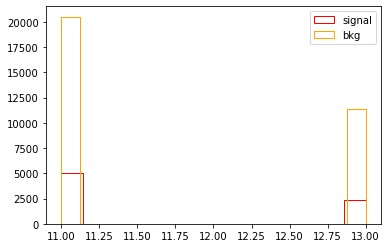

600GeV
lepton3_flavor


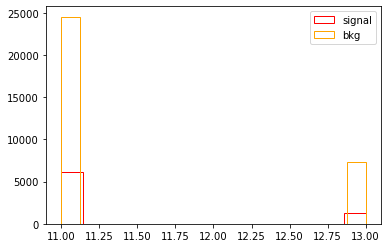

600GeV
lepton1_charge


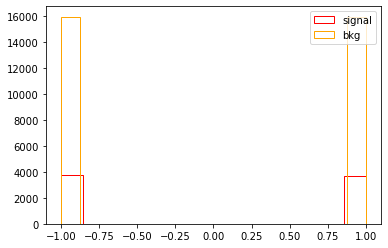

600GeV
lepton2_charge


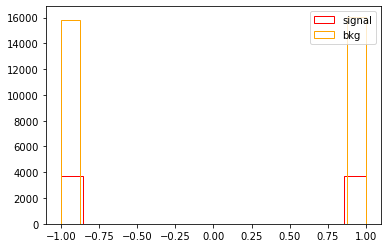

600GeV
lepton3_charge


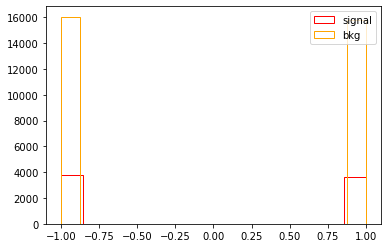

600GeV
signal


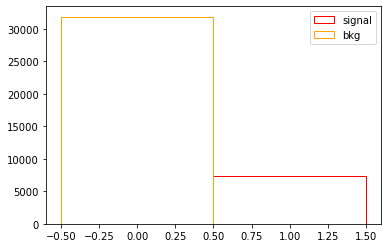

700GeV
lepton1_pt


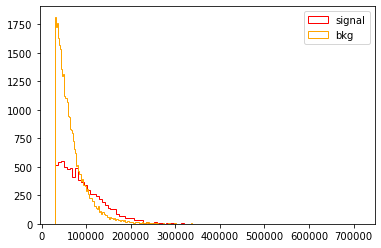

700GeV
lepton2_pt


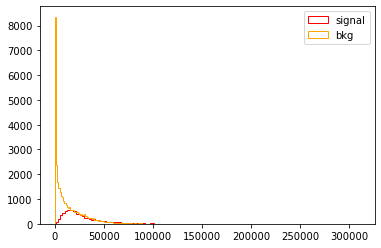

700GeV
lepton3_pt


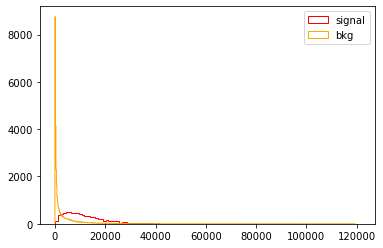

700GeV
lepton1_eta


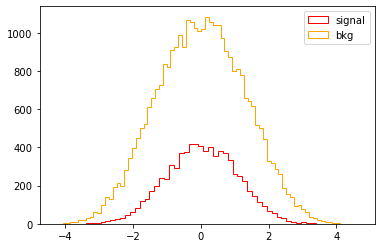

700GeV
lepton2_eta


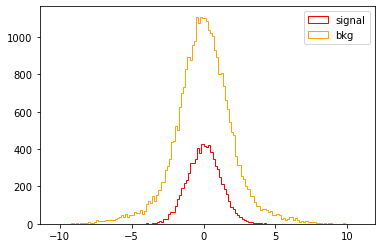

700GeV
lepton3_eta


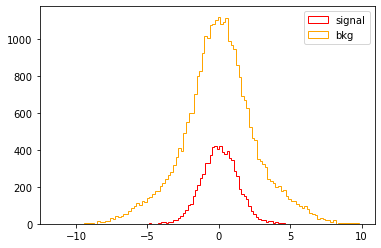

700GeV
lepton1_phi


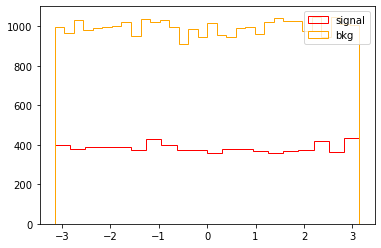

700GeV
lepton2_phi


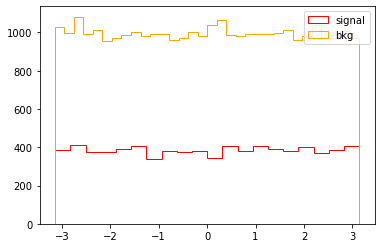

700GeV
lepton3_phi


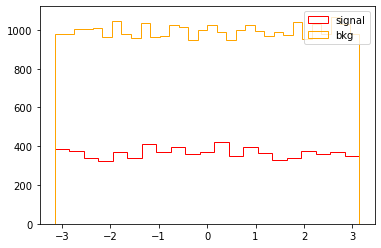

700GeV
MET


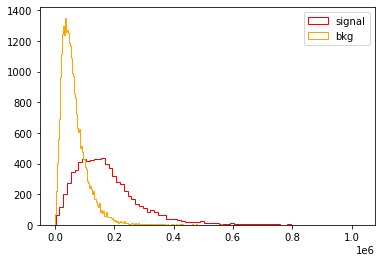

700GeV
MET_phi


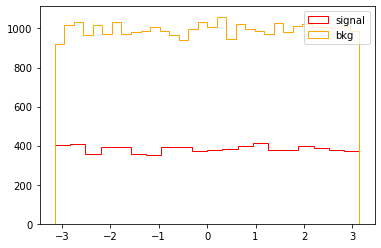

700GeV
lepton1_flavor


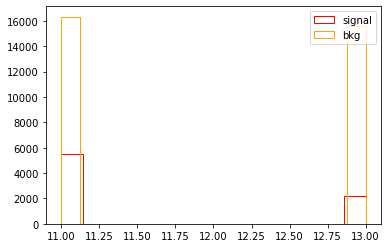

700GeV
lepton2_flavor


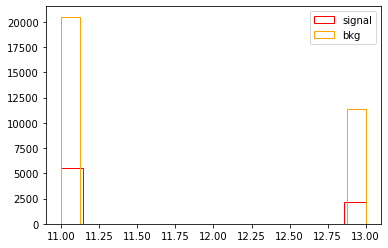

700GeV
lepton3_flavor


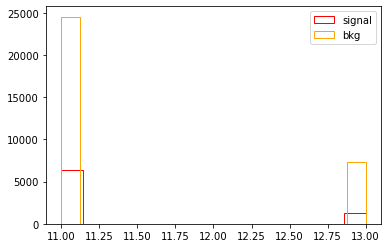

700GeV
lepton1_charge


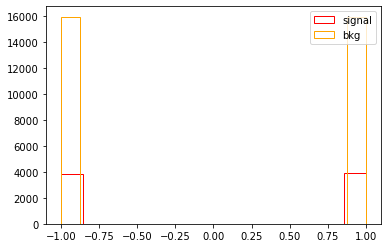

700GeV
lepton2_charge


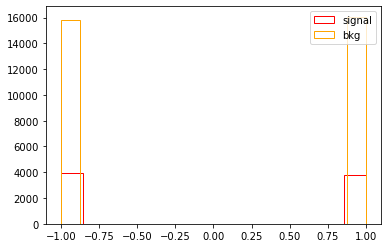

700GeV
lepton3_charge


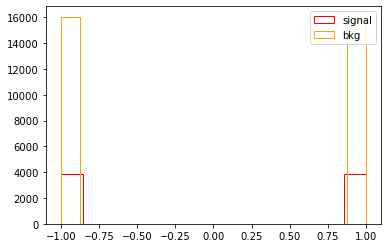

700GeV
signal


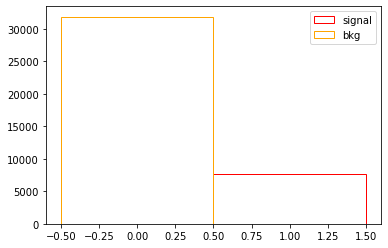

800GeV
lepton1_pt


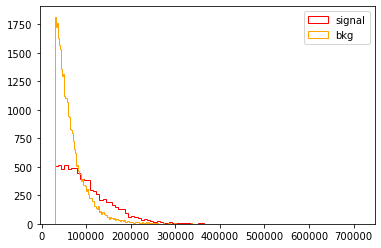

800GeV
lepton2_pt


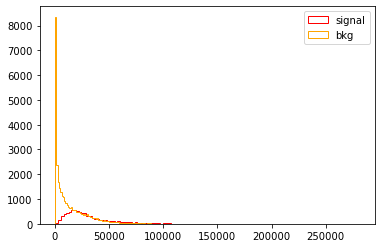

800GeV
lepton3_pt


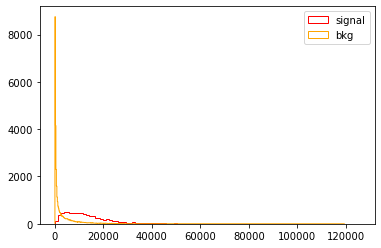

800GeV
lepton1_eta


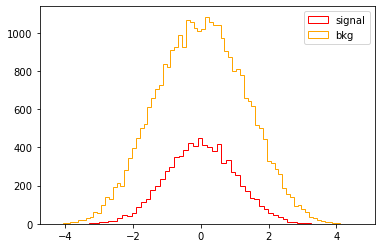

800GeV
lepton2_eta


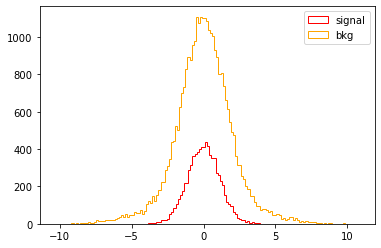

800GeV
lepton3_eta


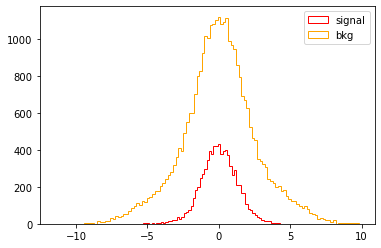

800GeV
lepton1_phi


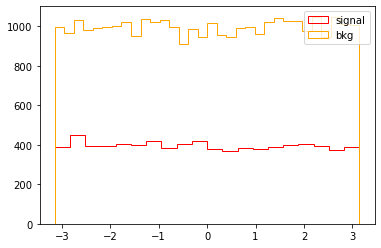

800GeV
lepton2_phi


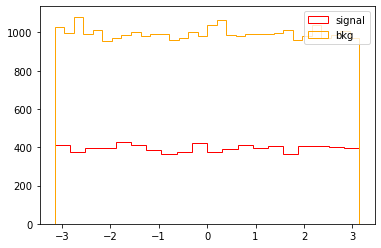

800GeV
lepton3_phi


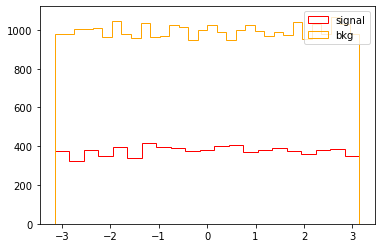

800GeV
MET


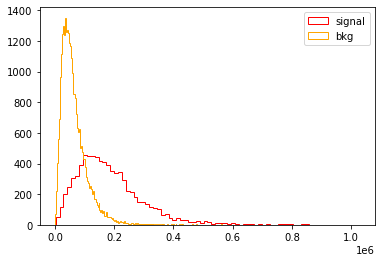

800GeV
MET_phi


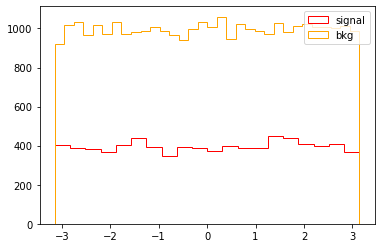

800GeV
lepton1_flavor


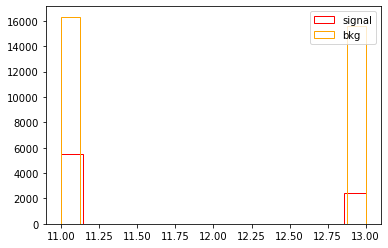

800GeV
lepton2_flavor


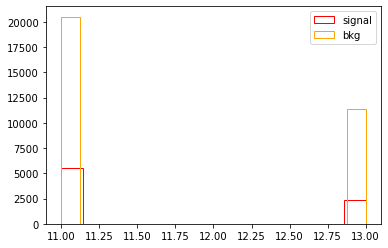

800GeV
lepton3_flavor


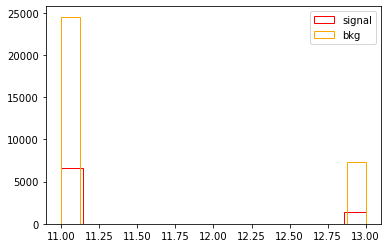

800GeV
lepton1_charge


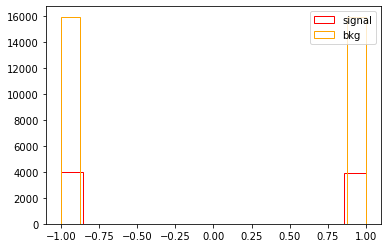

800GeV
lepton2_charge


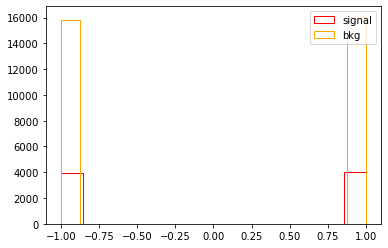

800GeV
lepton3_charge


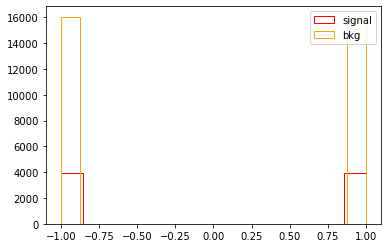

800GeV
signal


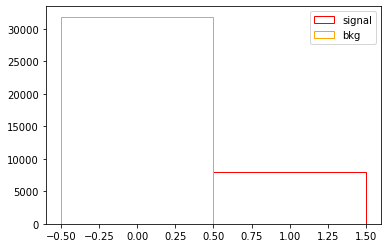

1000GeV
lepton1_pt


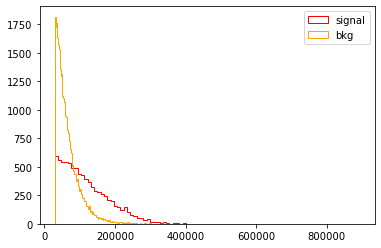

1000GeV
lepton2_pt


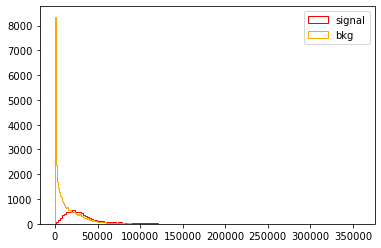

1000GeV
lepton3_pt


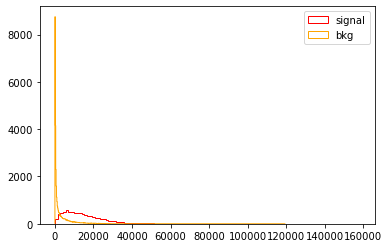

1000GeV
lepton1_eta


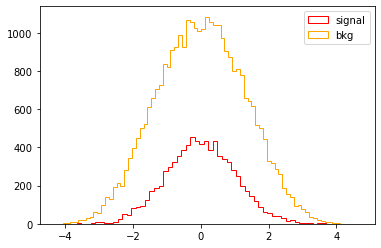

1000GeV
lepton2_eta


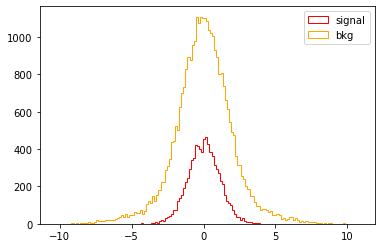

1000GeV
lepton3_eta


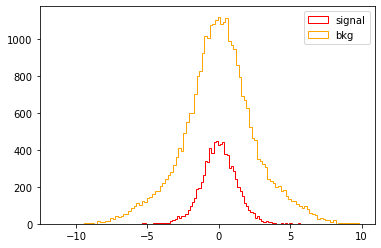

1000GeV
lepton1_phi


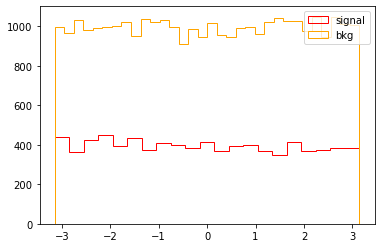

1000GeV
lepton2_phi


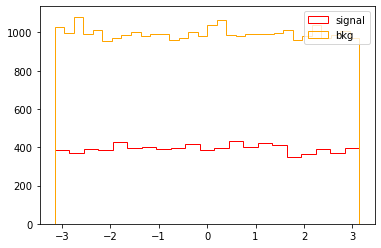

1000GeV
lepton3_phi


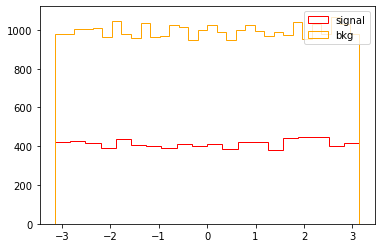

1000GeV
MET


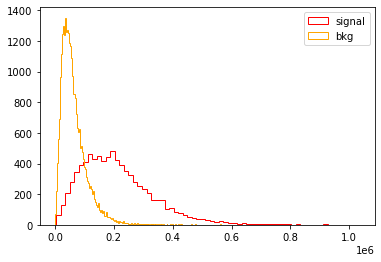

1000GeV
MET_phi


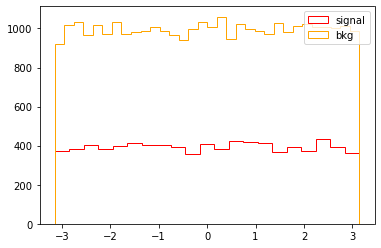

1000GeV
lepton1_flavor


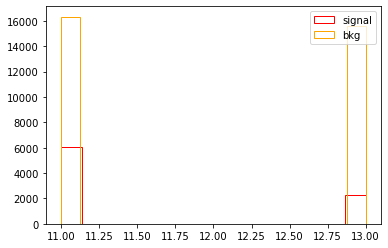

1000GeV
lepton2_flavor


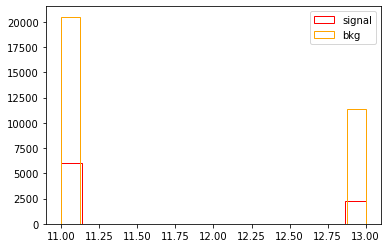

1000GeV
lepton3_flavor


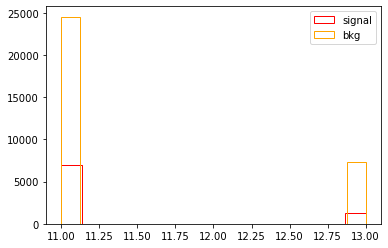

1000GeV
lepton1_charge


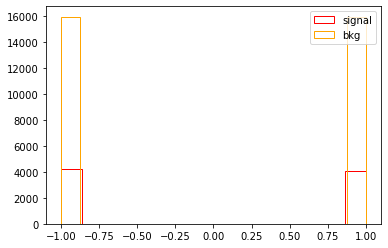

1000GeV
lepton2_charge


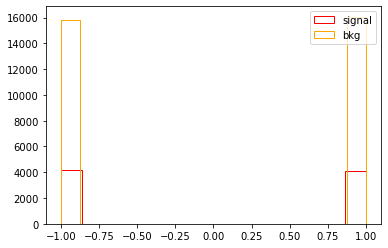

1000GeV
lepton3_charge


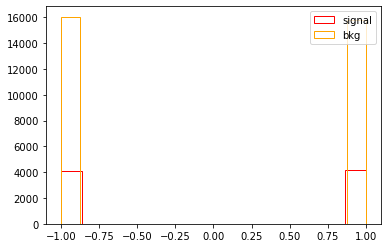

1000GeV
signal


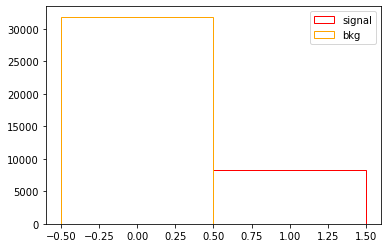

In [10]:
#overlay signal and background for variables list
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        plt.figure()
        plt.hist(df_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [11]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    return (n - n.min())/(n.max() - n.min())

In [12]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [13]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        #    if "flavor" or "charge" in var:
        #        series_list.append(df_sig[var])
        #        continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_pt
0        51223.647380
1        39826.765666
2       274797.911299
3        32568.389731
4        53245.448242
            ...      
7133     57836.754394
7134     82267.948390
7135    158604.053425
7136     50689.739645
7137     54156.193987
Name: lepton1_pt, Length: 7138, dtype: float64
30014.104333143543
448967.4182774383
0       0.050625
1       0.023422
2       0.584275
3       0.006097
4       0.055451
          ...   
7133    0.066410
7134    0.124725
7135    0.306931
7136    0.049351
7137    0.057625
Name: lepton1_pt, Length: 7138, dtype: float64
None
500GeV
lepton2_pt
0       49251.446265
1       15952.419812
2       39735.110176
3       32098.862625
4       19167.537509
            ...     
7133    16358.954455
7134    13332.932050
7135    13834.181300
7136    18812.107033
7137    25486.287013
Name: lepton2_pt, Length: 7138, dtype: float64
764.6381379172121
253686.0568487054
0       0.191707
1       0.060049
2       0.154081
3       0.123889
4       0.072761


600GeV
lepton1_pt
0        40595.999310
1       110034.655358
2        48669.005122
3        32769.991936
4        53309.858509
            ...      
7408    143981.659602
7409     88187.530671
7410    132506.654048
7411     70621.578518
7412    146096.490211
Name: lepton1_pt, Length: 7413, dtype: float64
30005.09995455093
509468.70687236375
0       0.022089
1       0.166915
2       0.038927
3       0.005767
4       0.048606
          ...   
7408    0.237717
7409    0.121349
7410    0.213784
7411    0.084712
7412    0.242128
Name: lepton1_pt, Length: 7413, dtype: float64
None
600GeV
lepton2_pt
0       39750.354045
1       11422.031686
2       17847.509185
3       23496.607850
4       18758.987951
            ...     
7408    38130.973385
7409    19167.276534
7410    17082.925361
7411    28781.280710
7412    28165.747329
Name: lepton2_pt, Length: 7413, dtype: float64
817.4205525814474
254833.61896542023
0       0.153269
1       0.041748
2       0.067043
3       0.089282
4       0.070632

700GeV
lepton1_pt
0        59398.268813
1        52813.199459
2        49743.909683
3        82892.863514
4       137770.140924
            ...      
7690    109513.153944
7691     80447.209516
7692    109619.111624
7693     72069.752838
7694     77135.726711
Name: lepton1_pt, Length: 7695, dtype: float64
30002.451849136512
581023.3134268239
0       0.053348
1       0.041397
2       0.035827
3       0.095986
4       0.195578
          ...   
7690    0.144297
7691    0.091548
7692    0.144489
7693    0.076344
7694    0.085538
Name: lepton1_pt, Length: 7695, dtype: float64
None
700GeV
lepton2_pt
0       52080.897572
1       41332.383305
2       14142.992266
3       18615.944179
4        9285.070617
            ...     
7690    15333.170815
7691    74078.166217
7692    16415.076930
7693    57949.595039
7694    55860.559626
Name: lepton2_pt, Length: 7695, dtype: float64
981.9611233958216
310165.9800937545
0       0.165270
1       0.130506
2       0.042567
3       0.057034
4       0.026855


800GeV
lepton1_pt
0       136034.546132
1        81590.973653
2        32642.536159
3        58125.163709
4        45272.647424
            ...      
7914    105238.017161
7915    164494.548648
7916    188242.360868
7917     92951.385865
7918     93080.184337
Name: lepton1_pt, Length: 7919, dtype: float64
30006.98604832712
649914.4369784639
0       0.171038
1       0.083212
2       0.004252
3       0.045359
4       0.024626
          ...   
7914    0.121358
7915    0.216948
7916    0.255256
7917    0.101538
7918    0.101746
Name: lepton1_pt, Length: 7919, dtype: float64
None
800GeV
lepton2_pt
0       15946.349741
1       15342.552200
2       24142.879938
3       47247.979479
4       32763.597742
            ...     
7914     5086.408890
7915    24622.120561
7916     3932.680822
7917    26210.345261
7918    29855.930100
Name: lepton2_pt, Length: 7919, dtype: float64
878.6826496818755
280923.82015338703
0       0.053804
1       0.051648
2       0.083073
3       0.165578
4       0.113856


1000GeV
lepton1_pt
0        98576.724587
1        82464.071225
2       108483.677197
3        96822.701807
4       160783.020718
            ...      
8274    117982.751817
8275    196549.976920
8276     42727.668171
8277     99953.534029
8278    197658.579086
Name: lepton1_pt, Length: 8279, dtype: float64
30040.54293412854
892295.2481901682
0       0.079485
1       0.060798
2       0.090974
3       0.077451
4       0.151629
          ...   
8274    0.101991
8275    0.193109
8276    0.014714
8277    0.081082
8278    0.194395
Name: lepton1_pt, Length: 8279, dtype: float64
None
1000GeV
lepton2_pt
0        25674.612240
1        28947.884183
2        29396.799862
3        27903.019629
4       109158.295565
            ...      
8274     17057.961721
8275     37881.976444
8276     33175.606619
8277     16814.031762
8278     50231.137614
Name: lepton2_pt, Length: 8279, dtype: float64
1054.3715865312456
357309.2027939462
0       0.069109
1       0.078297
2       0.079557
3       0.075364
4   

In [14]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
30001.713897238333
712731.1922377755
0        0.044573
1        0.124465
2        0.064553
3        0.029380
4        0.086743
           ...   
31874    0.003195
31875    0.081219
31876    0.031414
31877    0.032400
31878    0.087412
Name: lepton1_pt, Length: 31879, dtype: float64
None
lepton2_pt
2.2345796072460007
276077.6508794311
0        0.006412
1        0.000481
2        0.000597
3        0.016384
4        0.258253
           ...   
31874    0.011921
31875    0.009161
31876    0.102498
31877    0.019359
31878    0.001974
Name: lepton2_pt, Length: 31879, dtype: float64
None
lepton3_pt
0.1313820381791096
119461.24874608788
0        0.001331
1        0.000302
2        0.000802
3        0.002809
4        0.000403
           ...   
31874    0.000599
31875    0.014037
31876    0.054345
31877    0.022272
31878    0.003264
Name: lepton3_pt, Length: 31879, dtype: float64
None
lepton1_eta
-4.30264357393556
4.676305913623871
0        0.494609
1        0.309517
2        0.514780


In [15]:
df_norm_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,0.044573,0.006412,0.001331,0.494609,0.491744,0.542379,0.909987,0.654822,0.651103,0.121252,0.755709,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.124465,0.000481,0.000302,0.309517,0.245981,0.297505,0.334502,0.769569,0.770272,0.047576,0.409418,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.064553,0.000597,0.000802,0.514780,0.531841,0.573596,0.405417,0.516746,0.492050,0.036488,0.104628,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.029380,0.016384,0.002809,0.567474,0.442456,0.434311,0.964751,0.555543,0.874147,0.023454,0.452493,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.086743,0.258253,0.000403,0.405838,0.532415,0.305476,0.093579,0.494728,0.629783,0.132382,0.817080,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31874,0.003195,0.011921,0.000599,0.652465,0.600805,0.921969,0.715254,0.624868,0.644774,0.130653,0.986152,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31875,0.081219,0.009161,0.014037,0.314017,0.483274,0.533461,0.373947,0.939959,0.942522,0.032323,0.035886,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31876,0.031414,0.102498,0.054345,0.469862,0.504539,0.533858,0.238423,0.466921,0.487702,0.092024,0.041573,0.0,1.0,1.0,1.0,0.0,1.0,0.0
31877,0.032400,0.019359,0.022272,0.361260,0.454467,0.536241,0.171263,0.554343,0.777595,0.041196,0.001535,0.0,1.0,1.0,0.0,1.0,0.0,0.0


500GeV
lepton1_pt


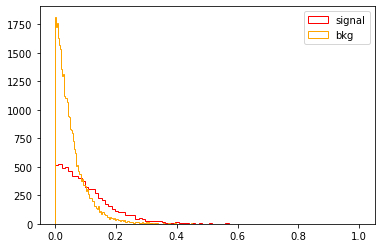

500GeV
lepton2_pt


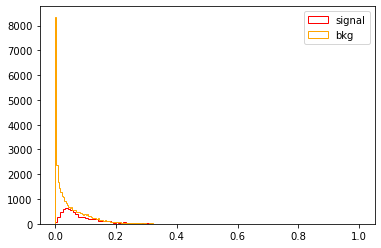

500GeV
lepton3_pt


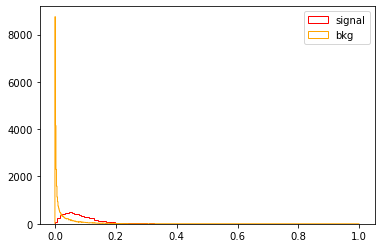

500GeV
lepton1_eta


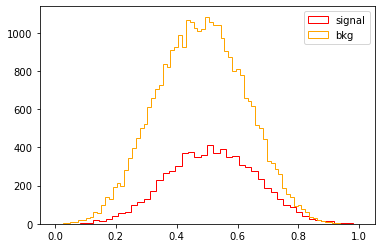

500GeV
lepton2_eta


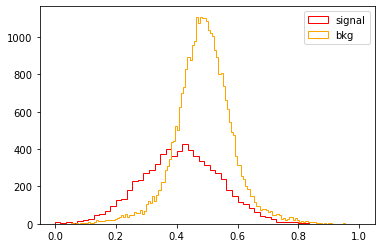

500GeV
lepton3_eta


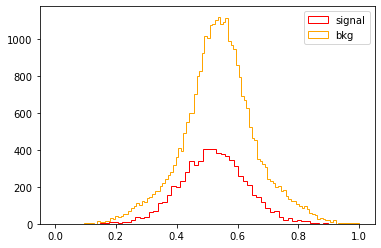

500GeV
lepton1_phi


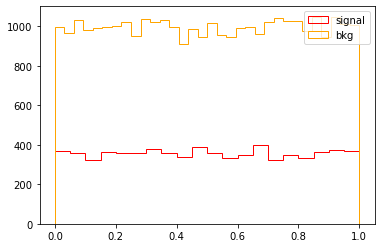

500GeV
lepton2_phi


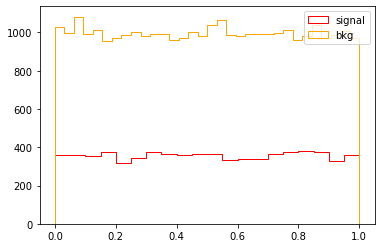

500GeV
lepton3_phi


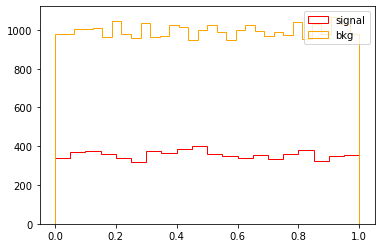

500GeV
MET


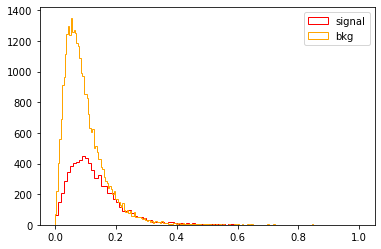

500GeV
MET_phi


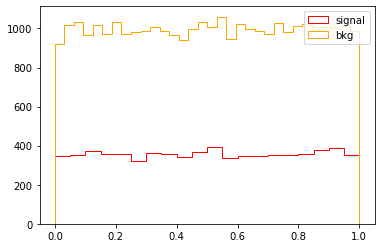

500GeV
lepton1_flavor


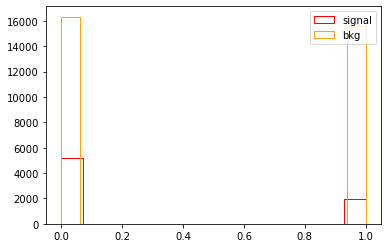

500GeV
lepton2_flavor


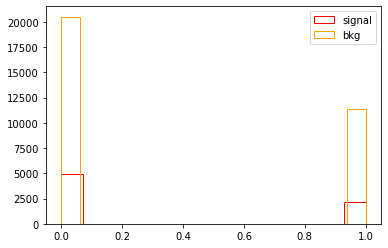

500GeV
lepton3_flavor


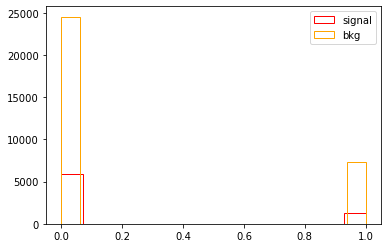

500GeV
lepton1_charge


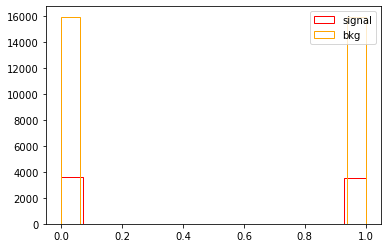

500GeV
lepton2_charge


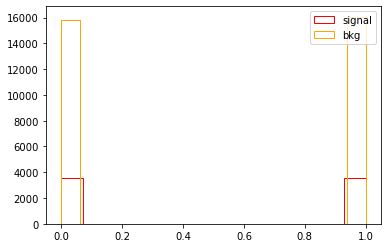

500GeV
lepton3_charge


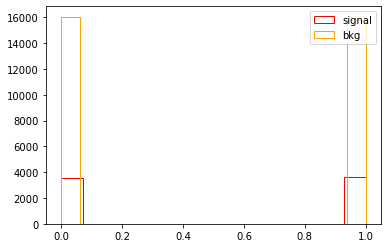

500GeV
signal


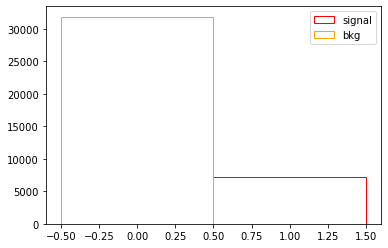

600GeV
lepton1_pt


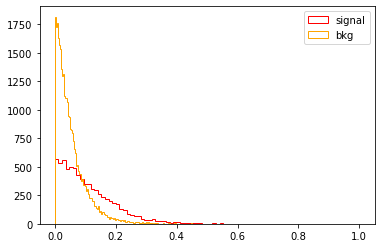

600GeV
lepton2_pt


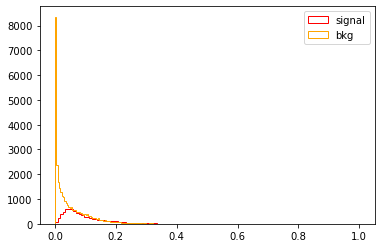

600GeV
lepton3_pt


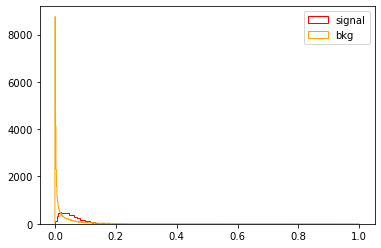

600GeV
lepton1_eta


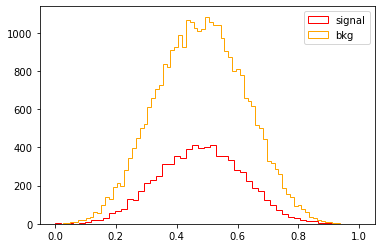

600GeV
lepton2_eta


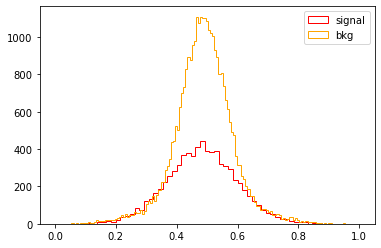

600GeV
lepton3_eta


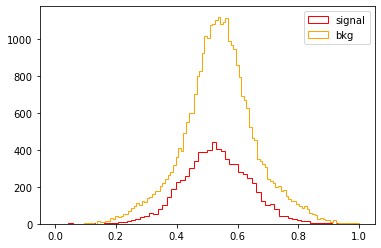

600GeV
lepton1_phi


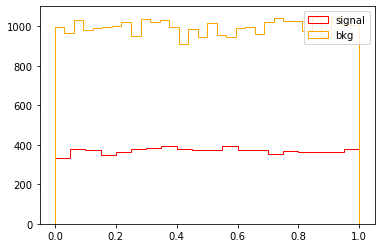

600GeV
lepton2_phi


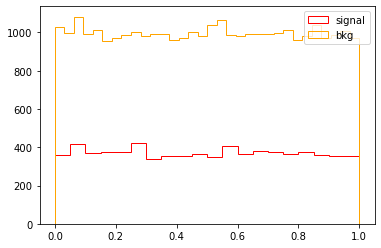

600GeV
lepton3_phi


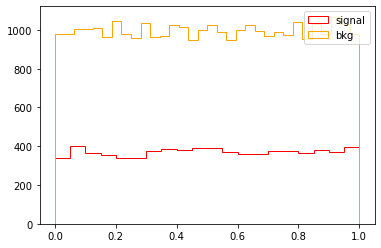

600GeV
MET


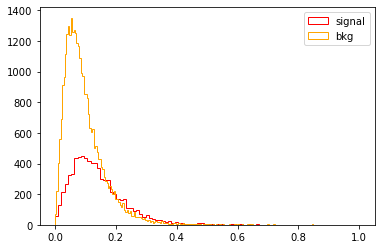

600GeV
MET_phi


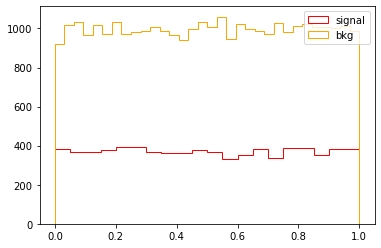

600GeV
lepton1_flavor


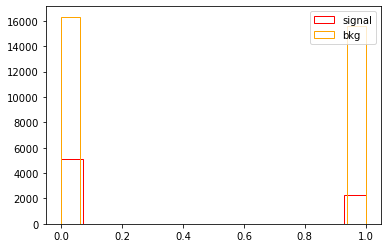

600GeV
lepton2_flavor


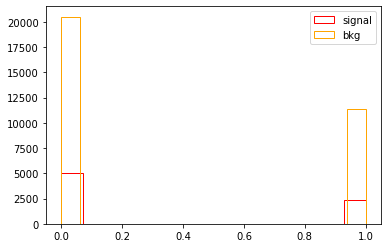

600GeV
lepton3_flavor


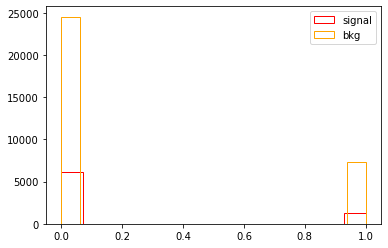

600GeV
lepton1_charge


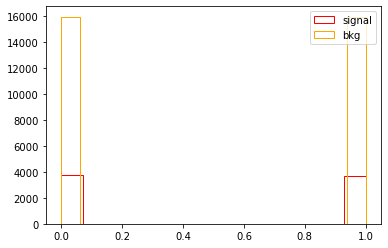

600GeV
lepton2_charge


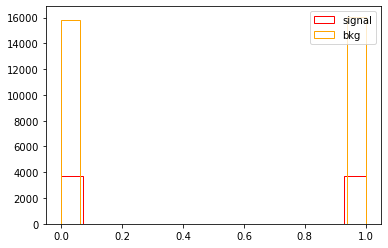

600GeV
lepton3_charge


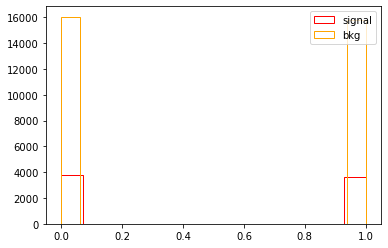

600GeV
signal


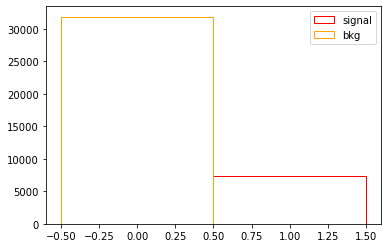

700GeV
lepton1_pt


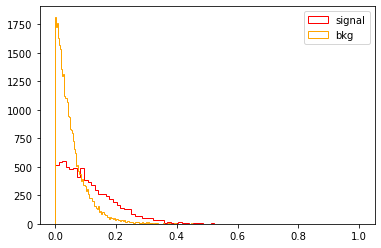

700GeV
lepton2_pt


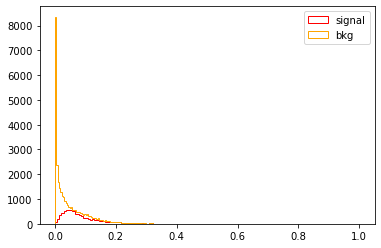

700GeV
lepton3_pt


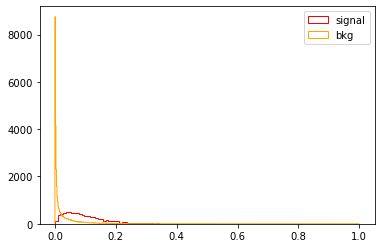

700GeV
lepton1_eta


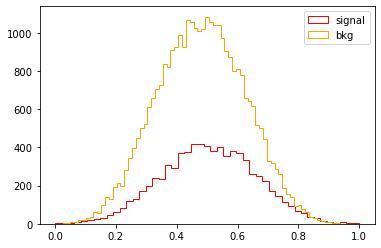

700GeV
lepton2_eta


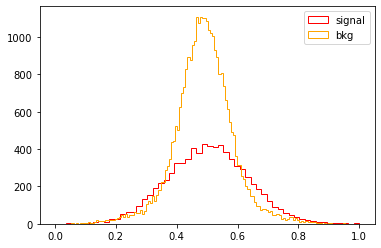

700GeV
lepton3_eta


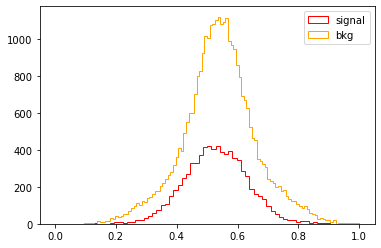

700GeV
lepton1_phi


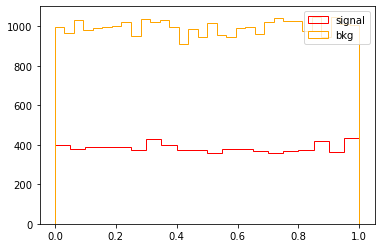

700GeV
lepton2_phi


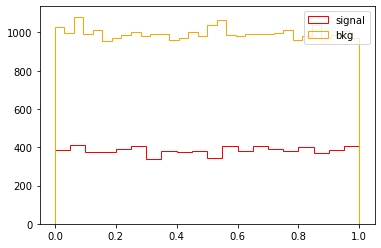

700GeV
lepton3_phi


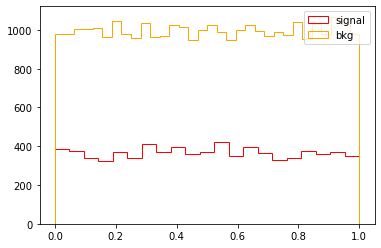

700GeV
MET


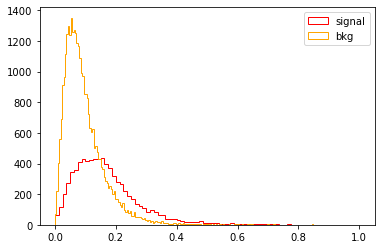

700GeV
MET_phi


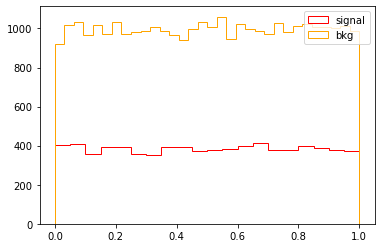

700GeV
lepton1_flavor


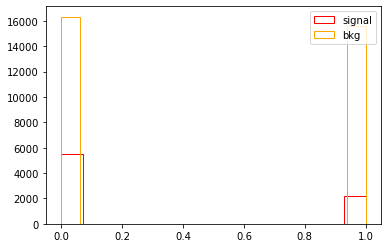

700GeV
lepton2_flavor


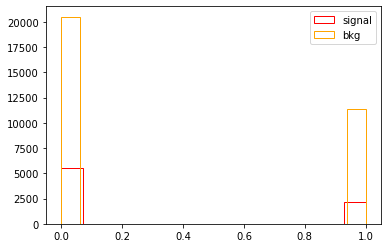

700GeV
lepton3_flavor


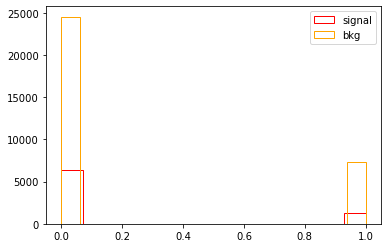

700GeV
lepton1_charge


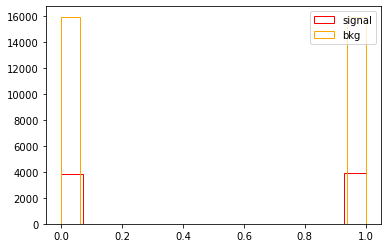

700GeV
lepton2_charge


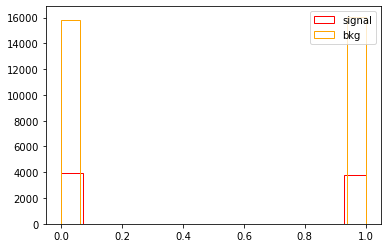

700GeV
lepton3_charge


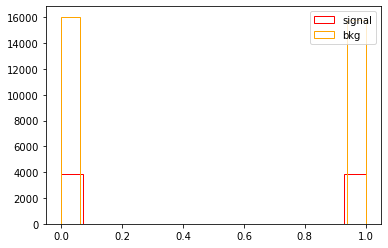

700GeV
signal


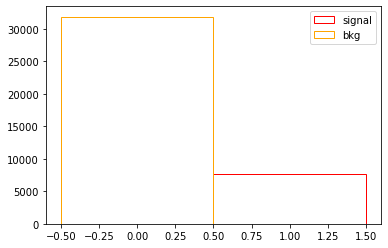

800GeV
lepton1_pt


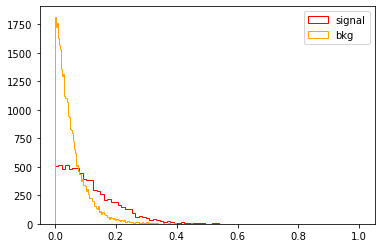

800GeV
lepton2_pt


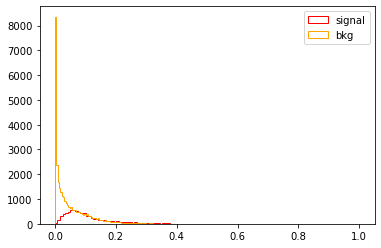

800GeV
lepton3_pt


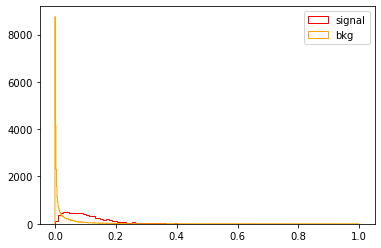

800GeV
lepton1_eta


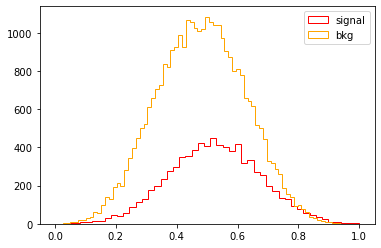

800GeV
lepton2_eta


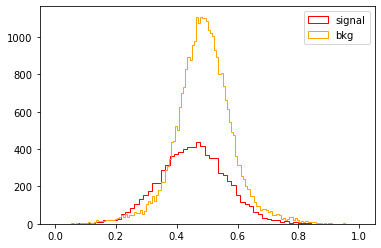

800GeV
lepton3_eta


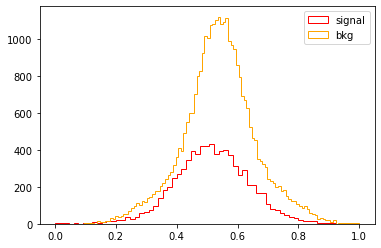

800GeV
lepton1_phi


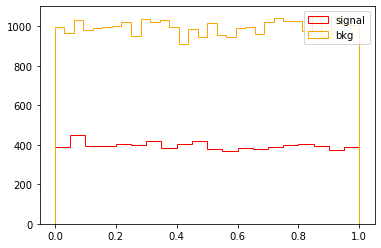

800GeV
lepton2_phi


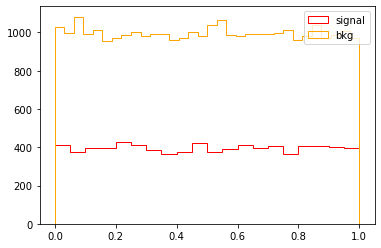

800GeV
lepton3_phi


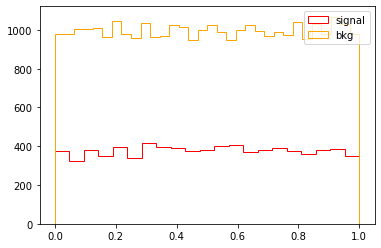

800GeV
MET


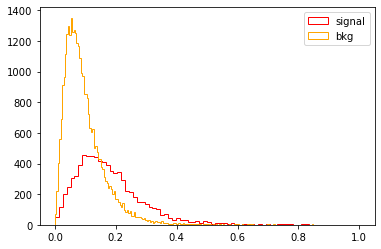

800GeV
MET_phi


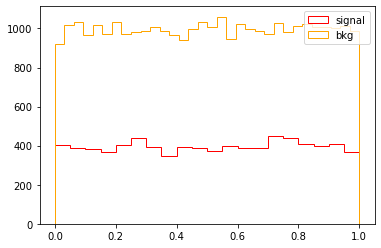

800GeV
lepton1_flavor


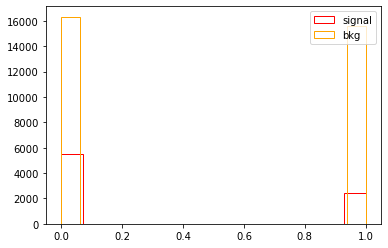

800GeV
lepton2_flavor


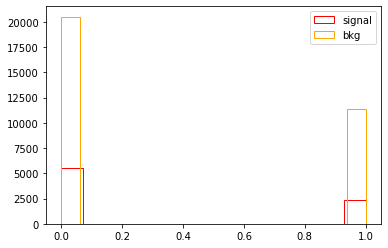

800GeV
lepton3_flavor


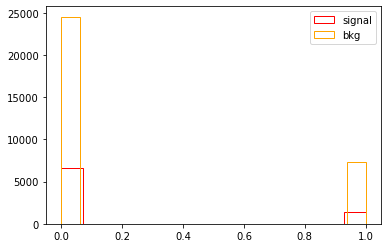

800GeV
lepton1_charge


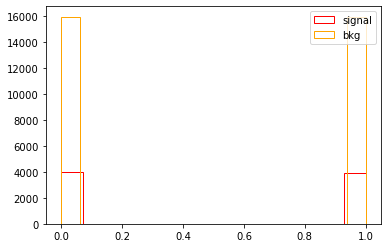

800GeV
lepton2_charge


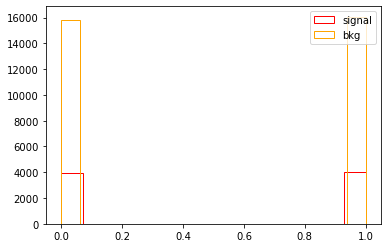

800GeV
lepton3_charge


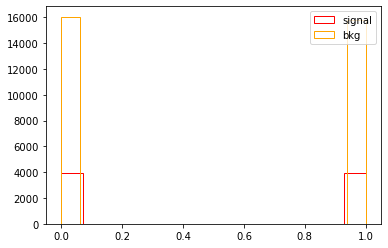

800GeV
signal


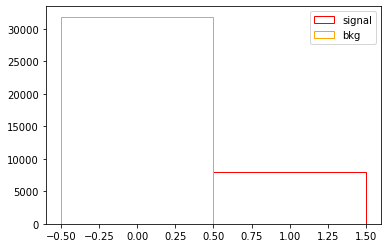

1000GeV
lepton1_pt


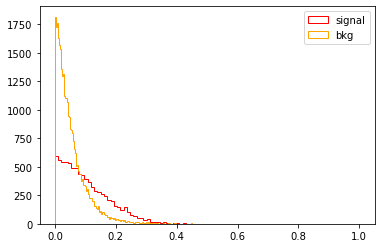

1000GeV
lepton2_pt


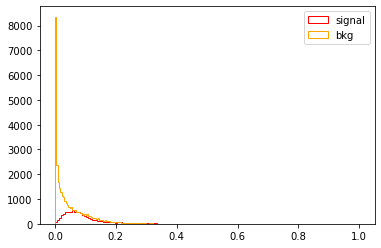

1000GeV
lepton3_pt


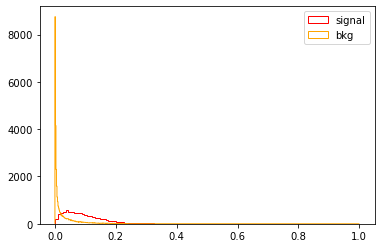

1000GeV
lepton1_eta


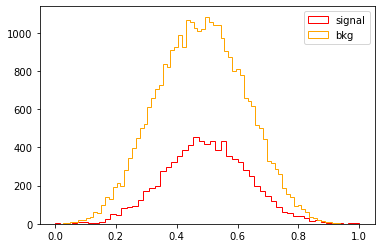

1000GeV
lepton2_eta


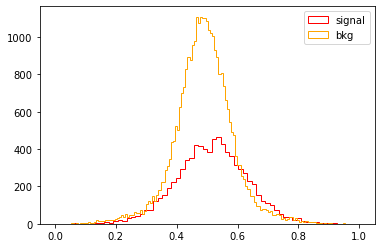

1000GeV
lepton3_eta


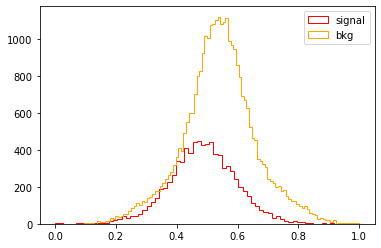

1000GeV
lepton1_phi


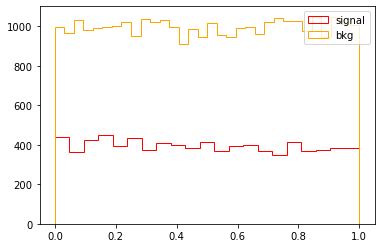

1000GeV
lepton2_phi


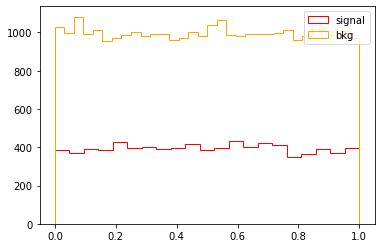

1000GeV
lepton3_phi


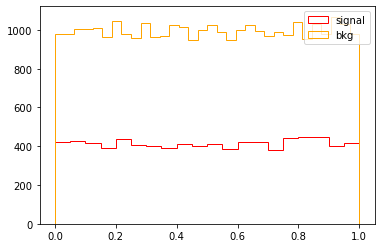

1000GeV
MET


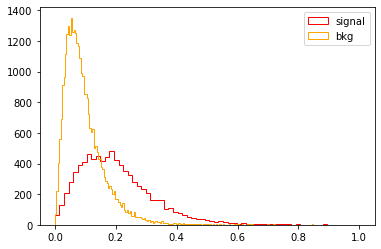

1000GeV
MET_phi


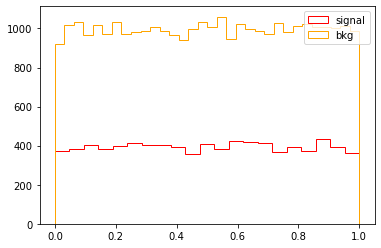

1000GeV
lepton1_flavor


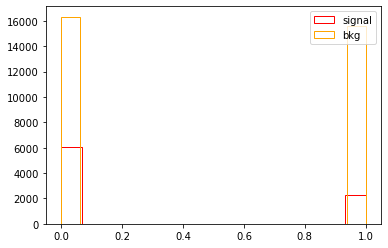

1000GeV
lepton2_flavor


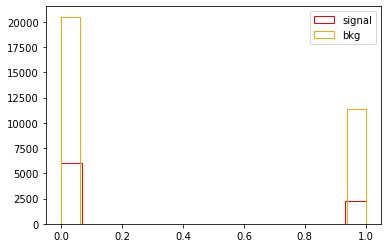

1000GeV
lepton3_flavor


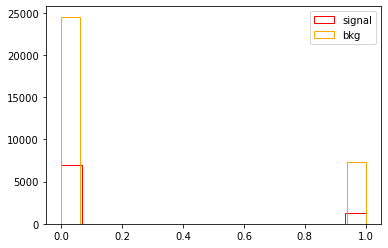

1000GeV
lepton1_charge


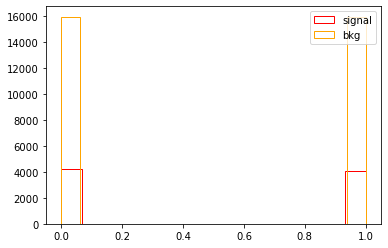

1000GeV
lepton2_charge


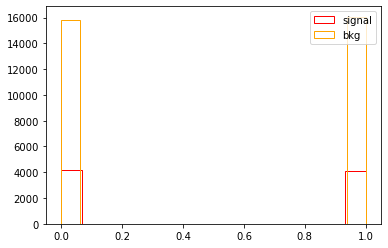

1000GeV
lepton3_charge


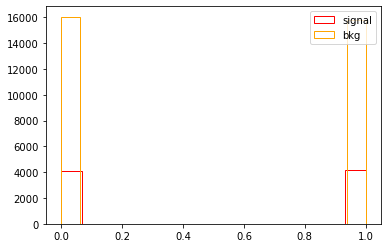

1000GeV
signal


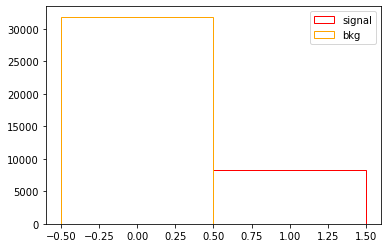

In [16]:
#Overlay standardized signal and bkg
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        plt.figure()
        plt.hist(df_norm_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [17]:
#using 80% of the (signal + bkg) data for training and the rest for test
n_sig = [int(7138*80/100),int(7413*80/100),int(7695*80/100),int(7919*80/100),int(8279*80/100)]
n_bkg = int(31979*80/100)
#n_sig = [int(n_sig_scaled[0]*9999*80/100),int(n_sig_scaled[1]*10000*80/100),int(n_sig_scaled[2]*9998*80/100),int(n_sig_scaled[3]*10000*80/100),int(n_sig_scaled[4]*9999*80/100)]
#n_bkg = int(n_bkg_scaled*80473*80/100)

In [18]:
df_train_500 = pd.concat([df_norm_sig[0].iloc[:n_sig[0]],df_norm_bkg.iloc[:n_bkg]])
df_test_500 =  pd.concat([df_norm_sig[0].iloc[n_sig[0]:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_500 = sklearn.utils.shuffle(df_train_500)
df_test_500 = sklearn.utils.shuffle(df_test_500)

#Reindex [0:n]
x_train_500 = df_train_500[variable].reset_index(drop=True)
y_train_500 = df_train_500["signal"].reset_index(drop=True)

x_test_500 = df_test_500[variable].reset_index(drop=True)
y_test_500 = df_test_500["signal"].reset_index(drop=True)

In [19]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_600 = pd.concat([df_norm_sig[1].iloc[:n_sig[1]],df_norm_bkg.iloc[:n_bkg]])
df_test_600 =  pd.concat([df_norm_sig[1].iloc[n_sig[1]:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_600 = sklearn.utils.shuffle(df_train_600)
df_test_600 = sklearn.utils.shuffle(df_test_600)

#Reindex [0:n]
x_train_600 = df_train_600[variable].reset_index(drop=True)
y_train_600 = df_train_600["signal"].reset_index(drop=True)

x_test_600 = df_test_600[variable].reset_index(drop=True)
y_test_600 = df_test_600["signal"].reset_index(drop=True)

In [20]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_700 = pd.concat([df_norm_sig[2].iloc[:n_sig[2]],df_norm_bkg.iloc[:n_bkg]])
df_test_700 =  pd.concat([df_norm_sig[2].iloc[n_sig[2]:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_700 = sklearn.utils.shuffle(df_train_700)
df_test_700 = sklearn.utils.shuffle(df_test_700)

#Reindex [0:n]
x_train_700 = df_train_700[variable].reset_index(drop=True)
y_train_700 = df_train_700["signal"].reset_index(drop=True)

x_test_700 = df_test_700[variable].reset_index(drop=True)
y_test_700 = df_test_700["signal"].reset_index(drop=True)

In [21]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_800 = pd.concat([df_norm_sig[3].iloc[:n_sig[3]],df_norm_bkg.iloc[:n_bkg]])
df_test_800 =  pd.concat([df_norm_sig[3].iloc[n_sig[3]:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_800 = sklearn.utils.shuffle(df_train_800)
df_test_800 = sklearn.utils.shuffle(df_test_800)

#Reindex [0:n]
x_train_800 = df_train_800[variable].reset_index(drop=True)
y_train_800 = df_train_800["signal"].reset_index(drop=True)

x_test_800 = df_test_800[variable].reset_index(drop=True)
y_test_800 = df_test_800["signal"].reset_index(drop=True)

In [22]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_1000 = pd.concat([df_norm_sig[4].iloc[:n_sig[4]],df_norm_bkg.iloc[:n_bkg]])
df_test_1000 =  pd.concat([df_norm_sig[4].iloc[n_sig[4]:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_1000 = sklearn.utils.shuffle(df_train_1000)
df_test_1000 = sklearn.utils.shuffle(df_test_1000)

#Reindex [0:n]
x_train_1000 = df_train_1000[variable].reset_index(drop=True)
y_train_1000 = df_train_1000["signal"].reset_index(drop=True)

x_test_1000 = df_test_1000[variable].reset_index(drop=True)
y_test_1000 = df_test_1000["signal"].reset_index(drop=True)

In [23]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

500GeV
lepton1_pt


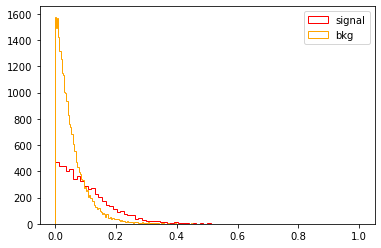

500GeV
lepton2_pt


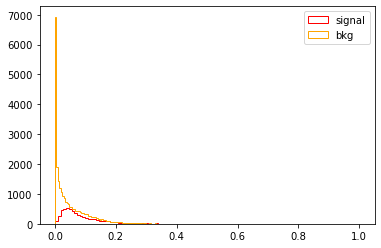

500GeV
lepton3_pt


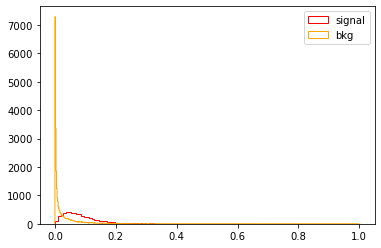

500GeV
lepton1_eta


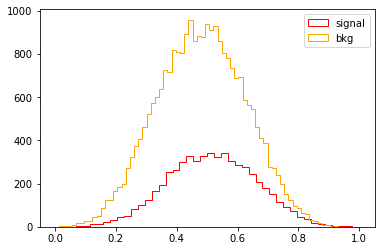

500GeV
lepton2_eta


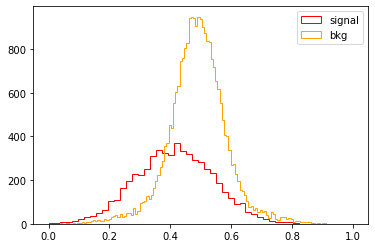

500GeV
lepton3_eta


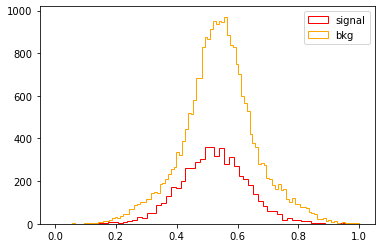

500GeV
lepton1_phi


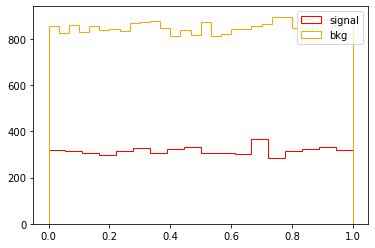

500GeV
lepton2_phi


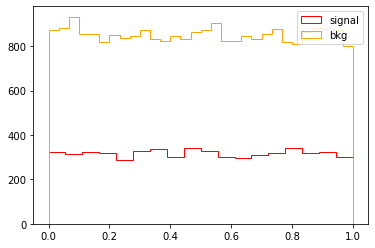

500GeV
lepton3_phi


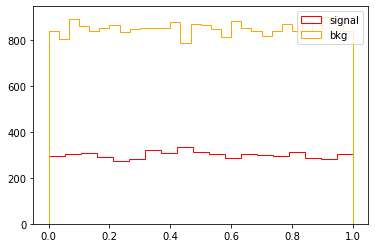

500GeV
MET


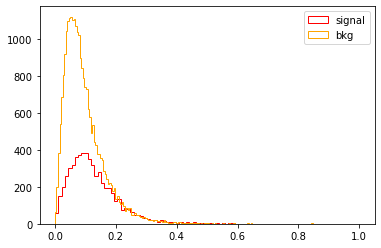

500GeV
MET_phi


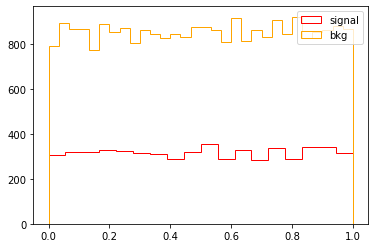

500GeV
lepton1_flavor


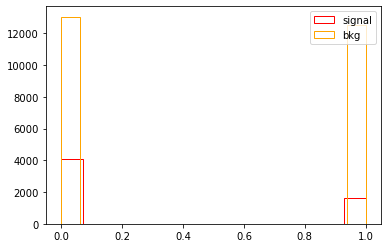

500GeV
lepton2_flavor


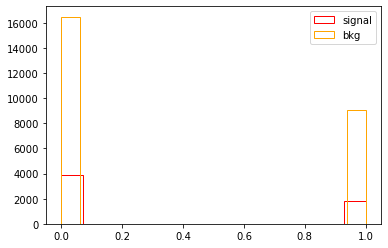

500GeV
lepton3_flavor


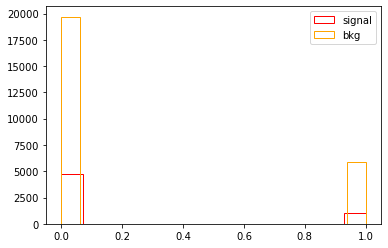

500GeV
lepton1_charge


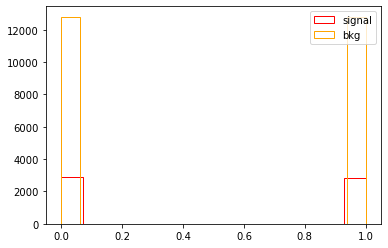

500GeV
lepton2_charge


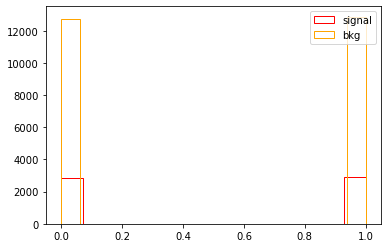

500GeV
lepton3_charge


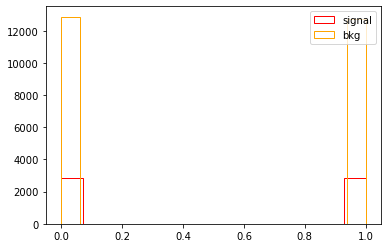

500GeV
signal


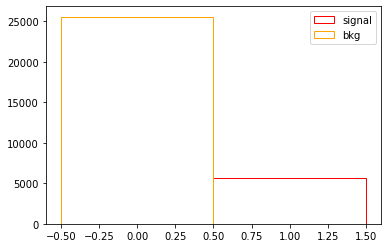

600GeV
lepton1_pt


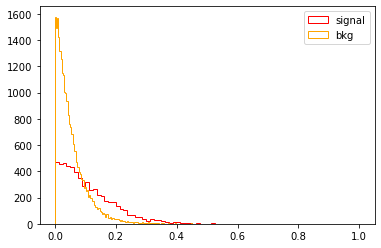

600GeV
lepton2_pt


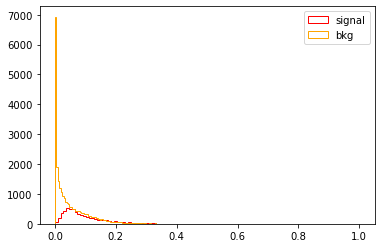

600GeV
lepton3_pt


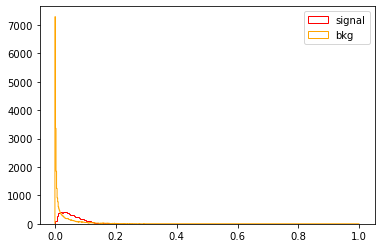

600GeV
lepton1_eta


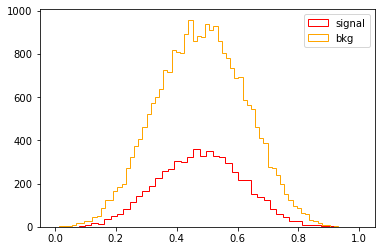

600GeV
lepton2_eta


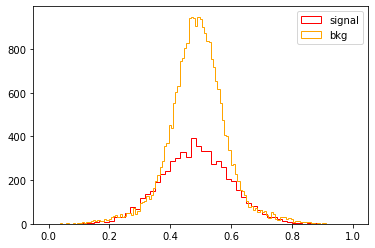

600GeV
lepton3_eta


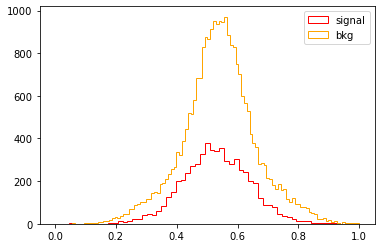

600GeV
lepton1_phi


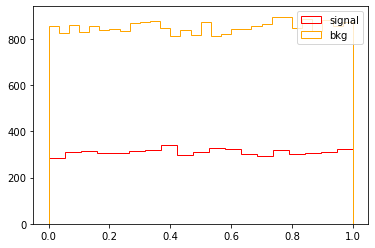

600GeV
lepton2_phi


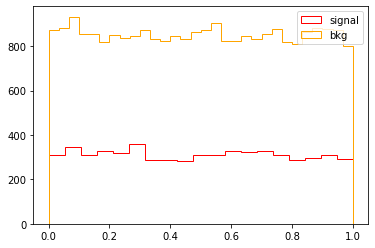

600GeV
lepton3_phi


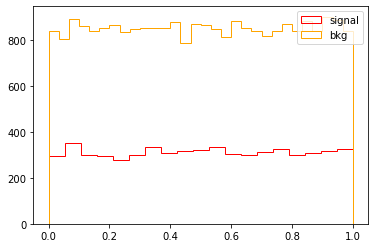

600GeV
MET


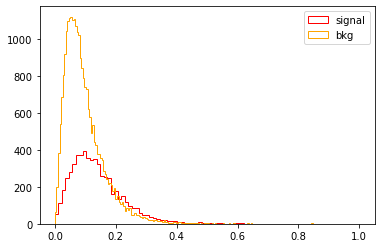

600GeV
MET_phi


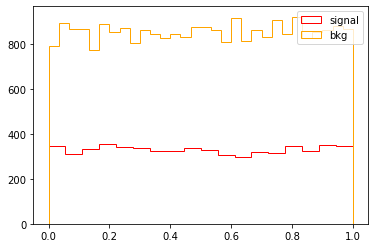

600GeV
lepton1_flavor


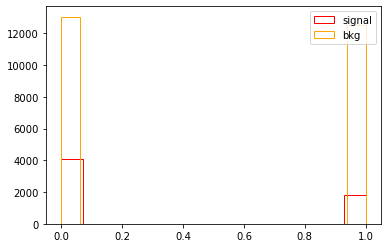

600GeV
lepton2_flavor


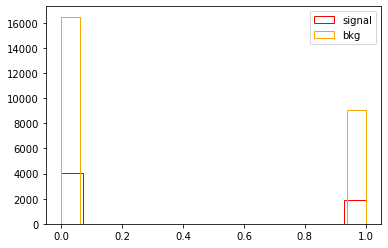

600GeV
lepton3_flavor


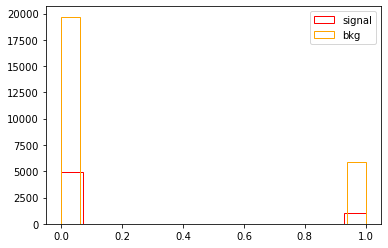

600GeV
lepton1_charge


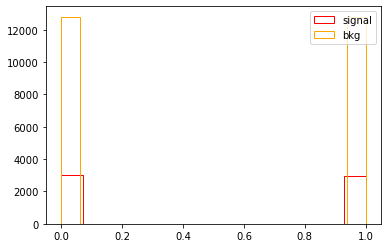

600GeV
lepton2_charge


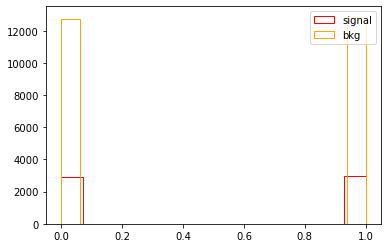

600GeV
lepton3_charge


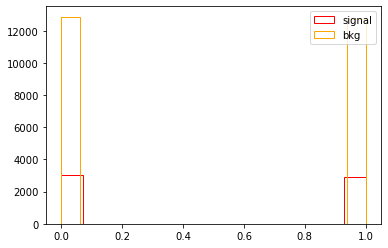

600GeV
signal


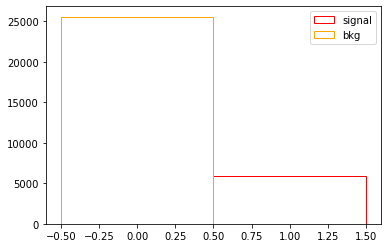

700GeV
lepton1_pt


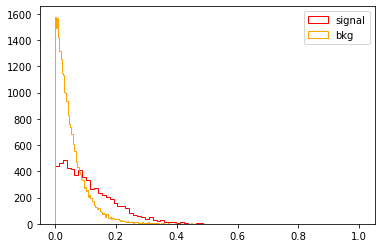

700GeV
lepton2_pt


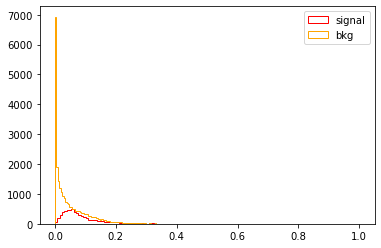

700GeV
lepton3_pt


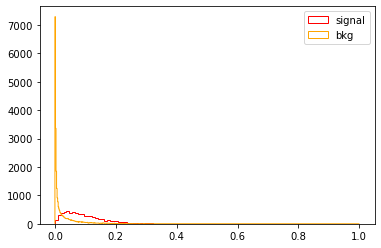

700GeV
lepton1_eta


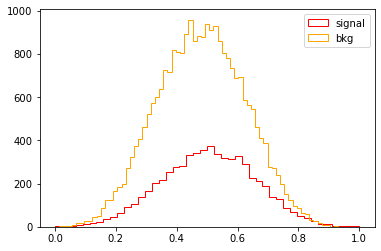

700GeV
lepton2_eta


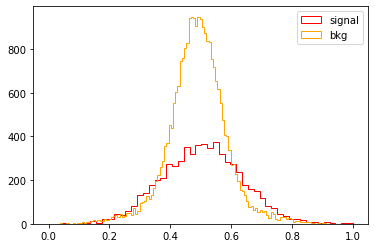

700GeV
lepton3_eta


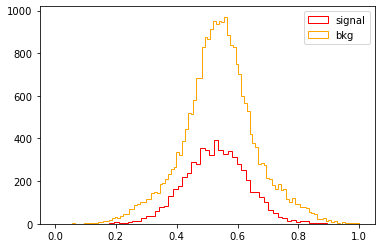

700GeV
lepton1_phi


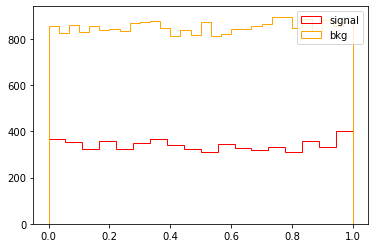

700GeV
lepton2_phi


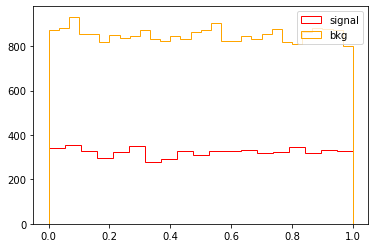

700GeV
lepton3_phi


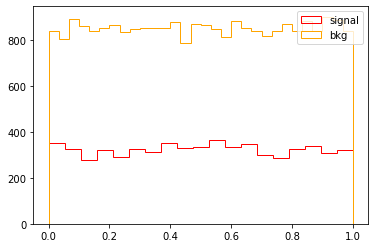

700GeV
MET


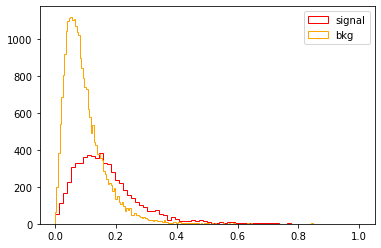

700GeV
MET_phi


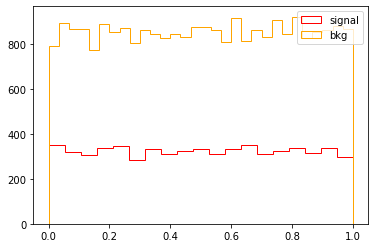

700GeV
lepton1_flavor


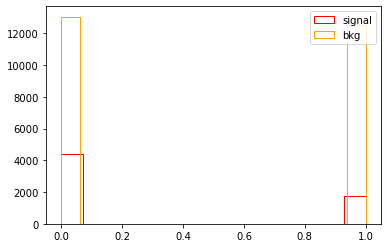

700GeV
lepton2_flavor


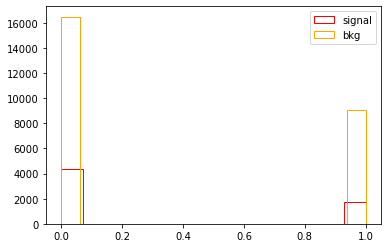

700GeV
lepton3_flavor


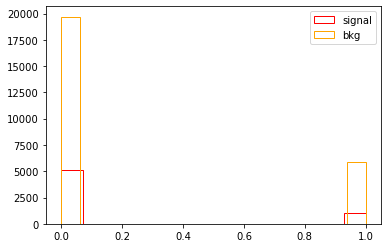

700GeV
lepton1_charge


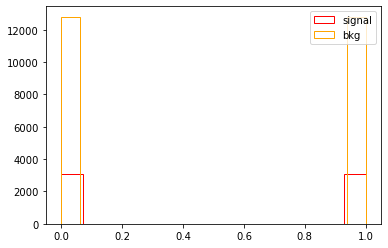

700GeV
lepton2_charge


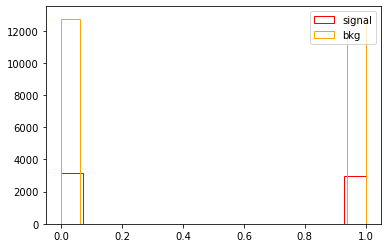

700GeV
lepton3_charge


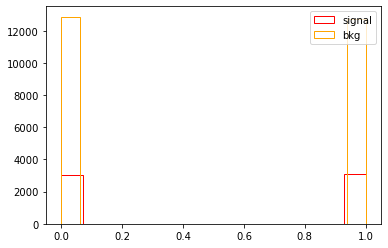

700GeV
signal


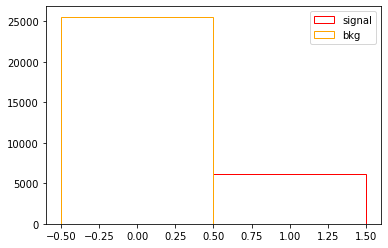

800GeV
lepton1_pt


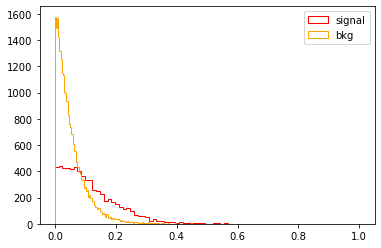

800GeV
lepton2_pt


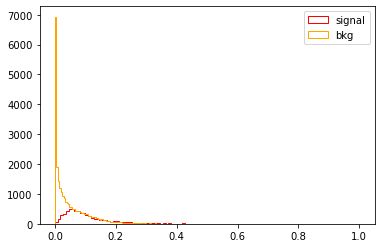

800GeV
lepton3_pt


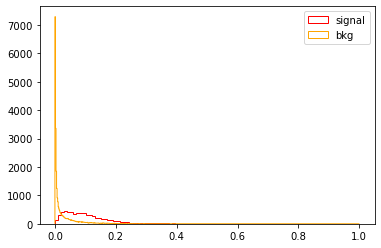

800GeV
lepton1_eta


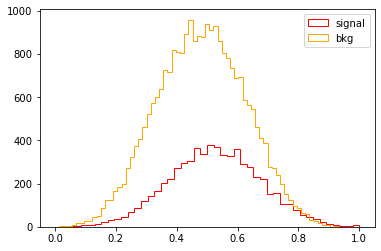

800GeV
lepton2_eta


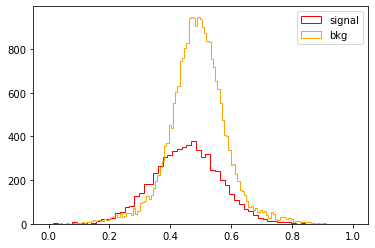

800GeV
lepton3_eta


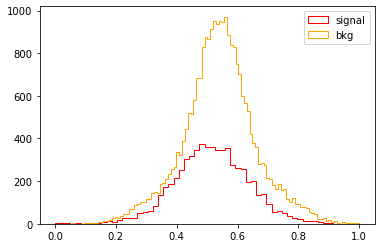

800GeV
lepton1_phi


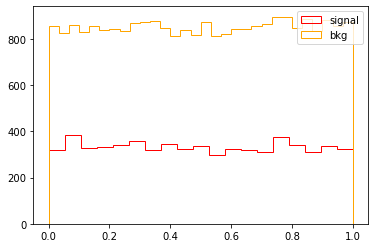

800GeV
lepton2_phi


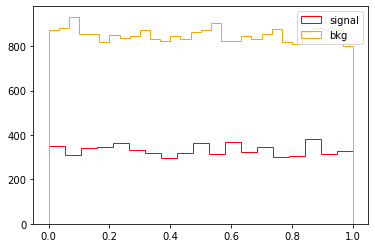

800GeV
lepton3_phi


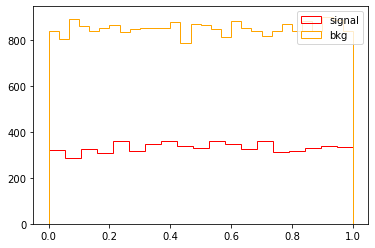

800GeV
MET


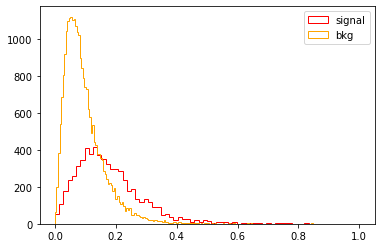

800GeV
MET_phi


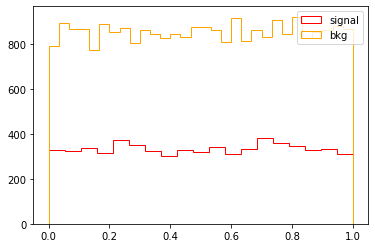

800GeV
lepton1_flavor


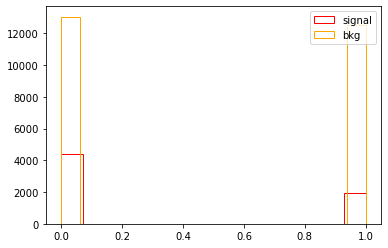

800GeV
lepton2_flavor


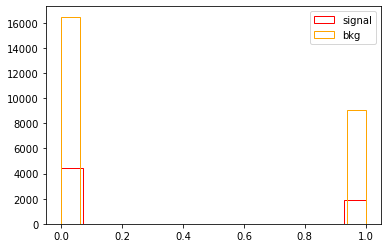

800GeV
lepton3_flavor


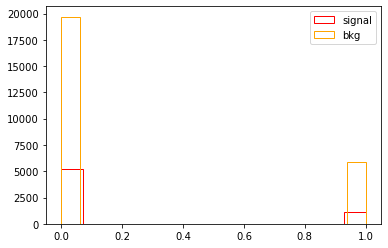

800GeV
lepton1_charge


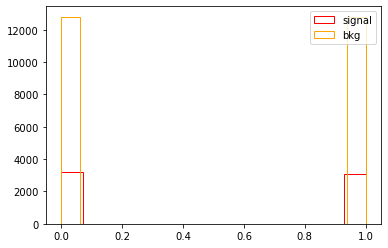

800GeV
lepton2_charge


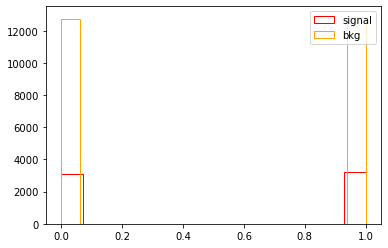

800GeV
lepton3_charge


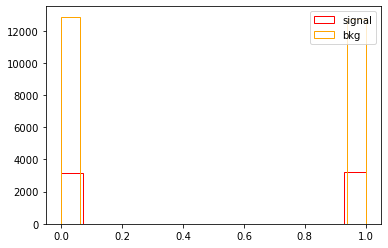

800GeV
signal


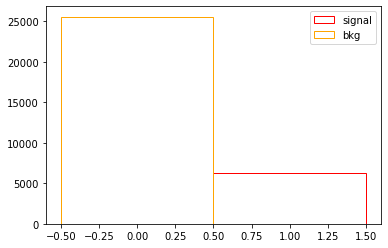

1000GeV
lepton1_pt


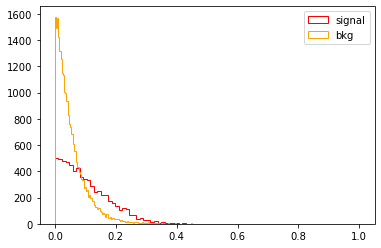

1000GeV
lepton2_pt


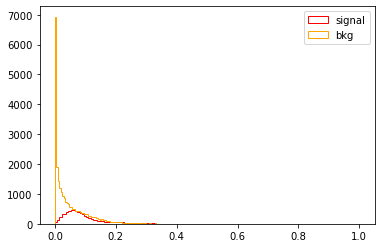

1000GeV
lepton3_pt


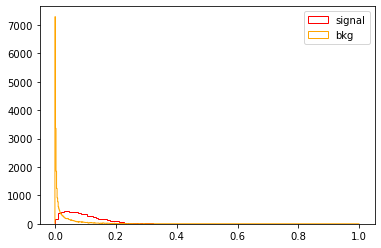

1000GeV
lepton1_eta


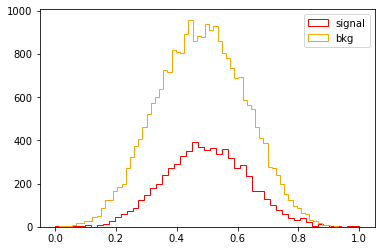

1000GeV
lepton2_eta


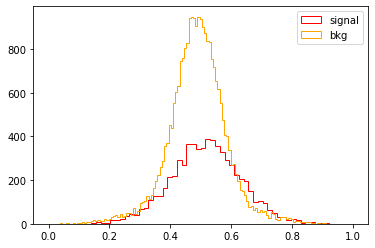

1000GeV
lepton3_eta


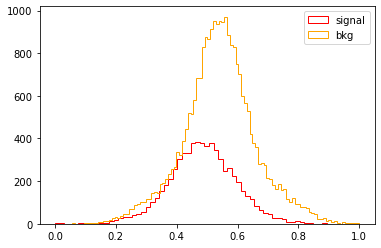

1000GeV
lepton1_phi


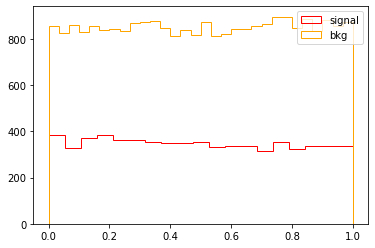

1000GeV
lepton2_phi


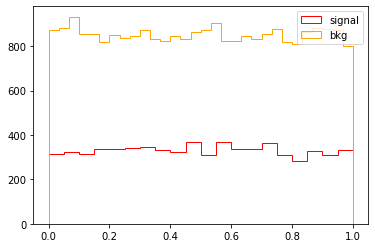

1000GeV
lepton3_phi


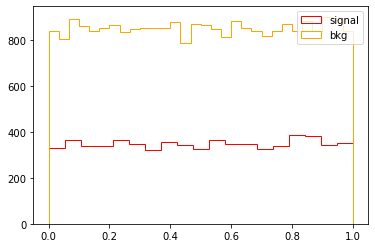

1000GeV
MET


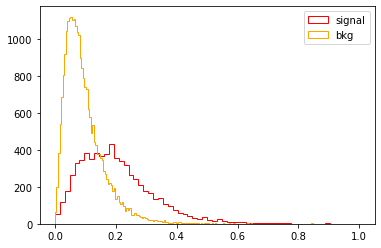

1000GeV
MET_phi


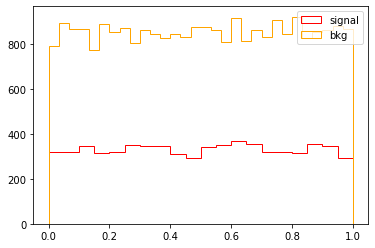

1000GeV
lepton1_flavor


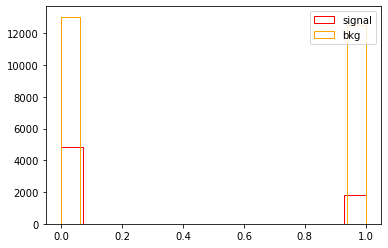

1000GeV
lepton2_flavor


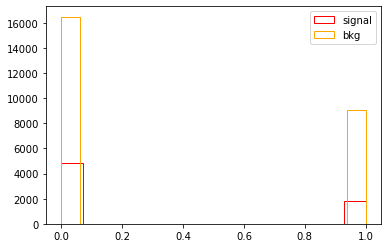

1000GeV
lepton3_flavor


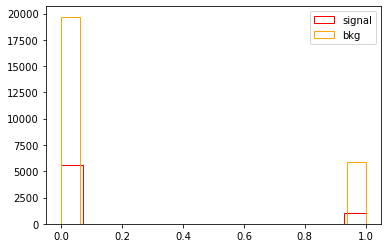

1000GeV
lepton1_charge


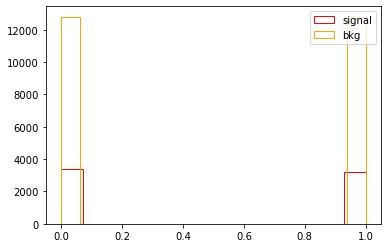

1000GeV
lepton2_charge


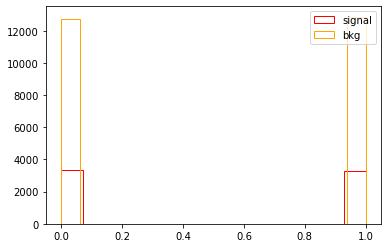

1000GeV
lepton3_charge


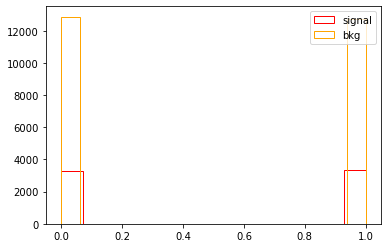

1000GeV
signal


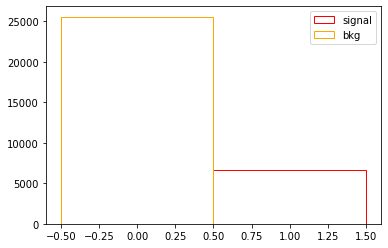

In [24]:
#Plot 80% of new df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[:n_sig[sig]][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

500GeV
lepton1_pt


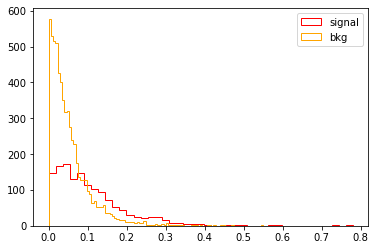

500GeV
lepton2_pt


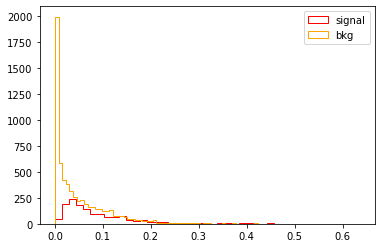

500GeV
lepton3_pt


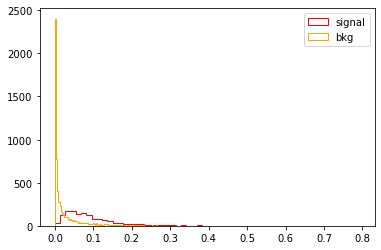

500GeV
lepton1_eta


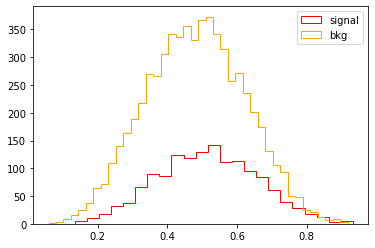

500GeV
lepton2_eta


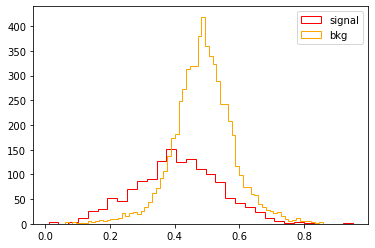

500GeV
lepton3_eta


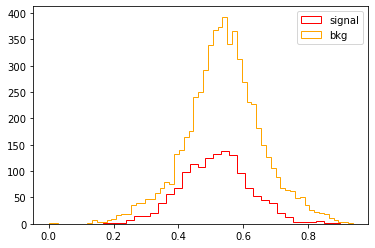

500GeV
lepton1_phi


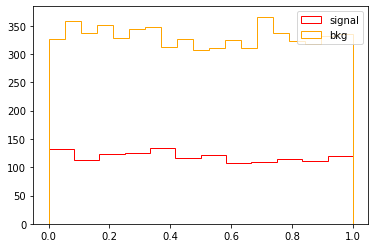

500GeV
lepton2_phi


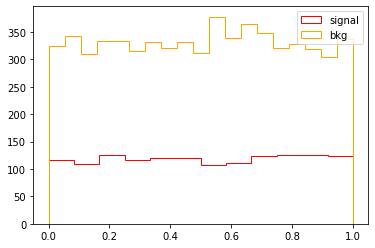

500GeV
lepton3_phi


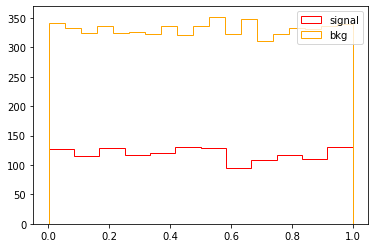

500GeV
MET


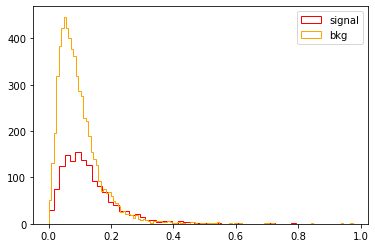

500GeV
MET_phi


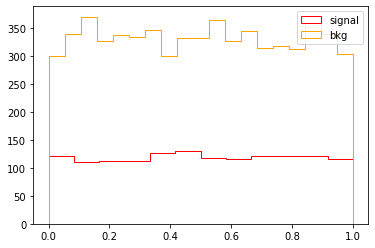

500GeV
lepton1_flavor


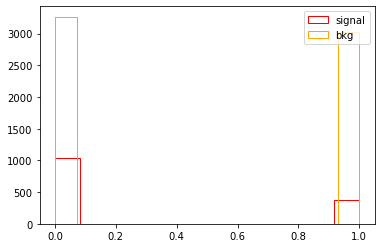

500GeV
lepton2_flavor


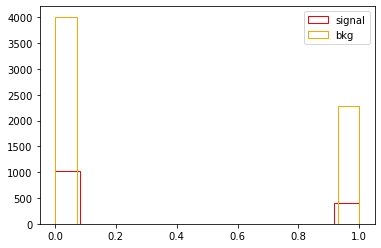

500GeV
lepton3_flavor


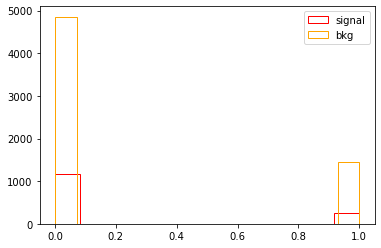

500GeV
lepton1_charge


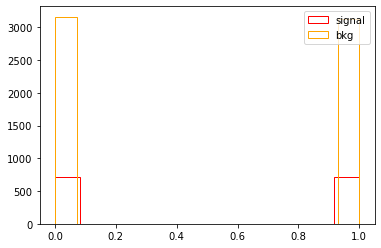

500GeV
lepton2_charge


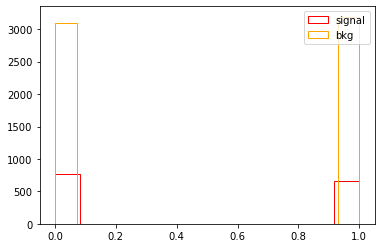

500GeV
lepton3_charge


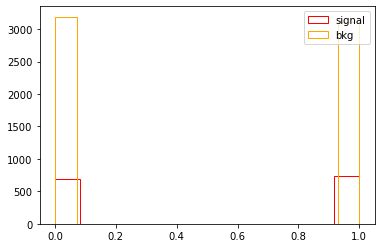

500GeV
signal


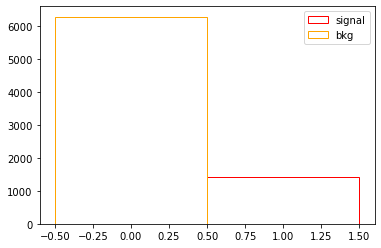

600GeV
lepton1_pt


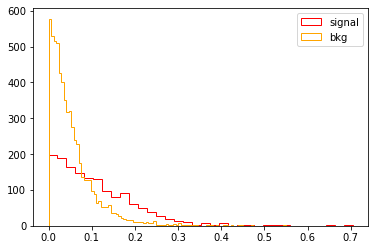

600GeV
lepton2_pt


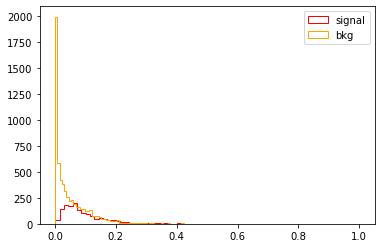

600GeV
lepton3_pt


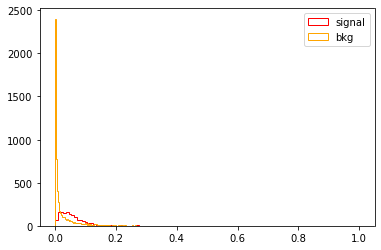

600GeV
lepton1_eta


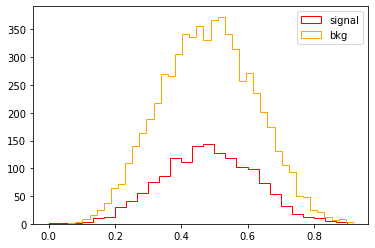

600GeV
lepton2_eta


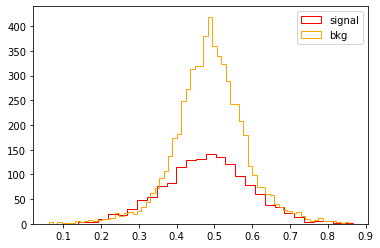

600GeV
lepton3_eta


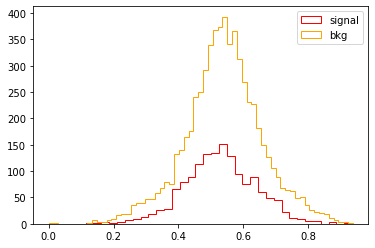

600GeV
lepton1_phi


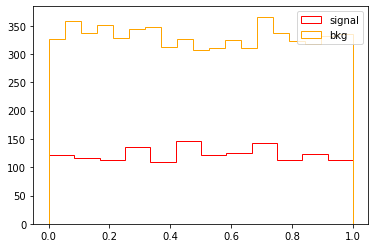

600GeV
lepton2_phi


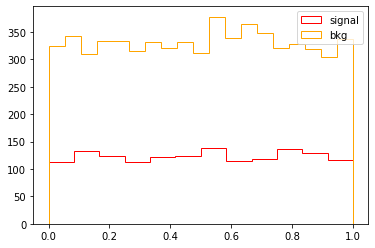

600GeV
lepton3_phi


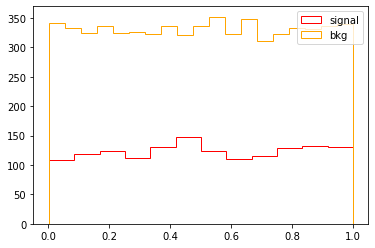

600GeV
MET


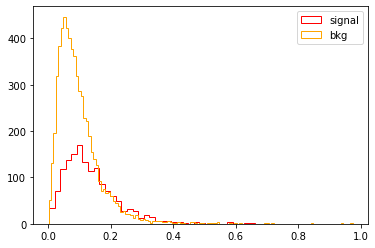

600GeV
MET_phi


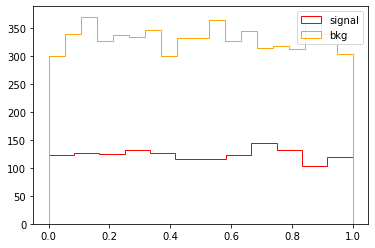

600GeV
lepton1_flavor


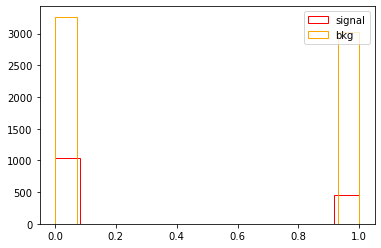

600GeV
lepton2_flavor


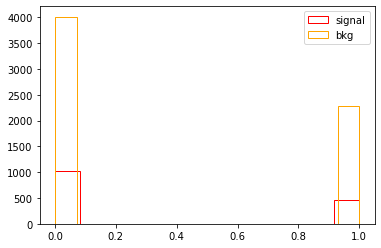

600GeV
lepton3_flavor


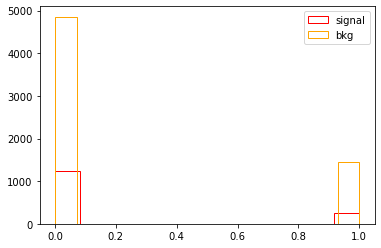

600GeV
lepton1_charge


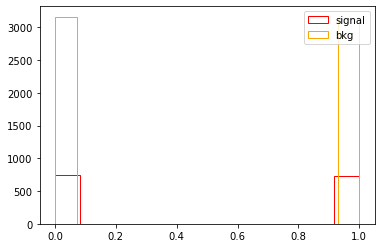

600GeV
lepton2_charge


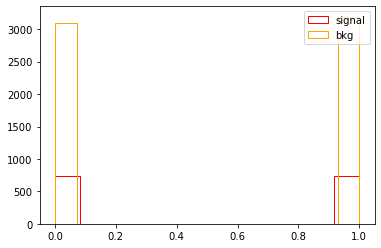

600GeV
lepton3_charge


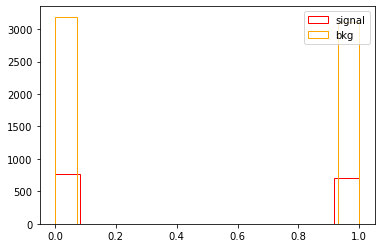

600GeV
signal


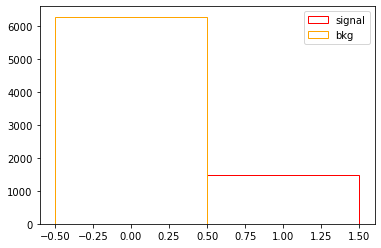

700GeV
lepton1_pt


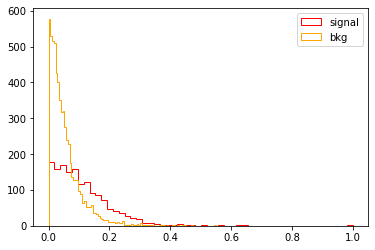

700GeV
lepton2_pt


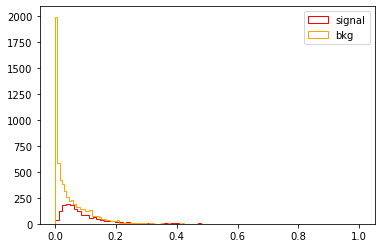

700GeV
lepton3_pt


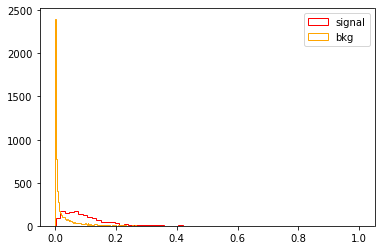

700GeV
lepton1_eta


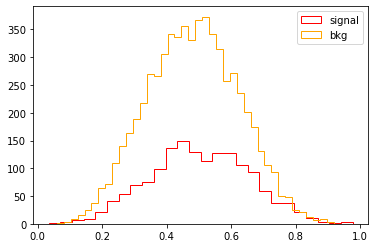

700GeV
lepton2_eta


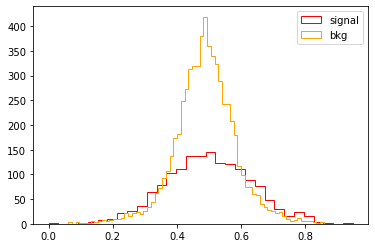

700GeV
lepton3_eta


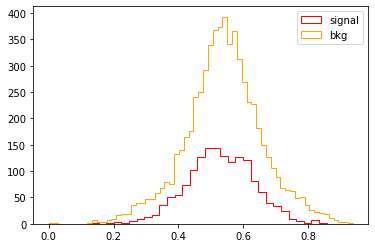

700GeV
lepton1_phi


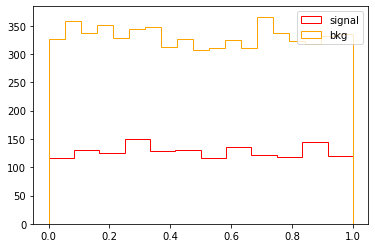

700GeV
lepton2_phi


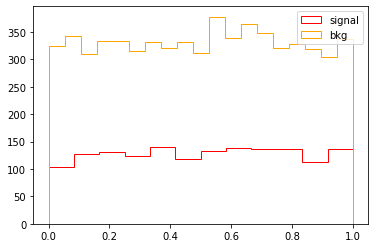

700GeV
lepton3_phi


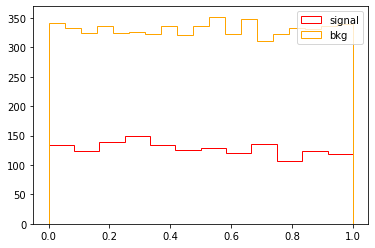

700GeV
MET


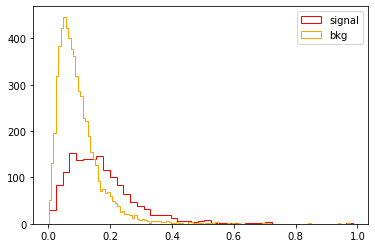

700GeV
MET_phi


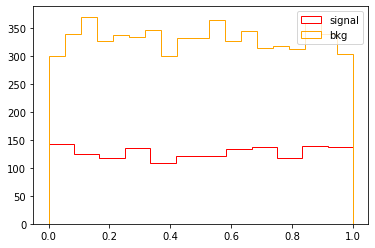

700GeV
lepton1_flavor


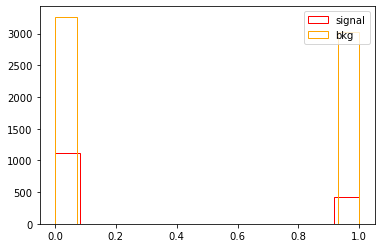

700GeV
lepton2_flavor


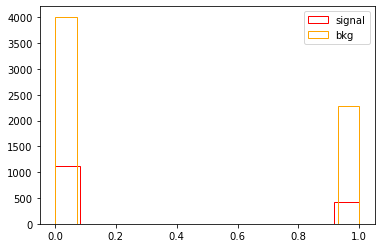

700GeV
lepton3_flavor


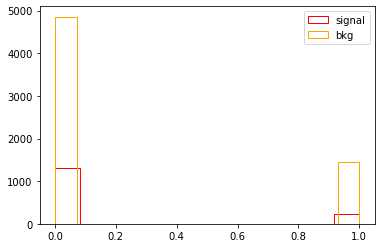

700GeV
lepton1_charge


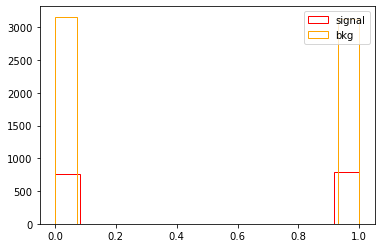

700GeV
lepton2_charge


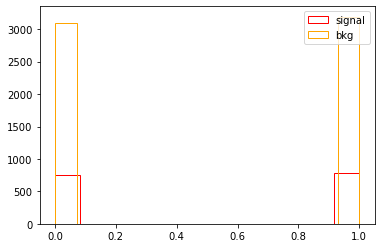

700GeV
lepton3_charge


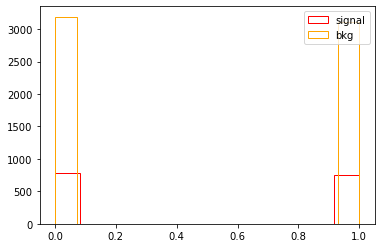

700GeV
signal


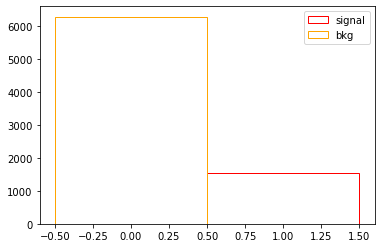

800GeV
lepton1_pt


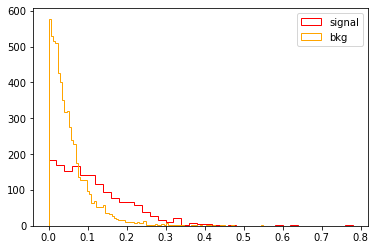

800GeV
lepton2_pt


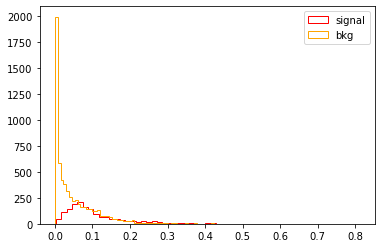

800GeV
lepton3_pt


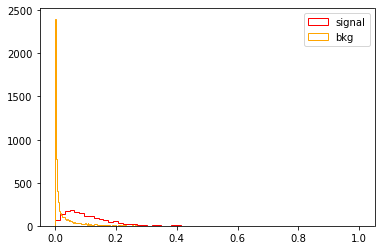

800GeV
lepton1_eta


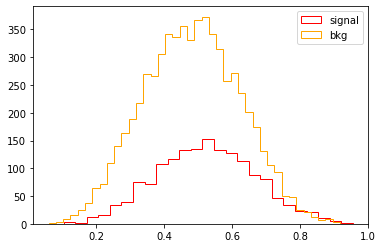

800GeV
lepton2_eta


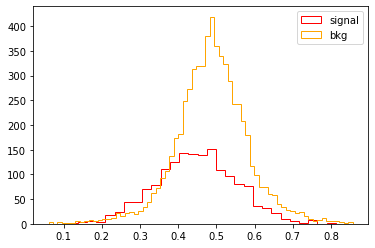

800GeV
lepton3_eta


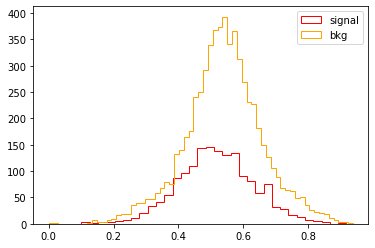

800GeV
lepton1_phi


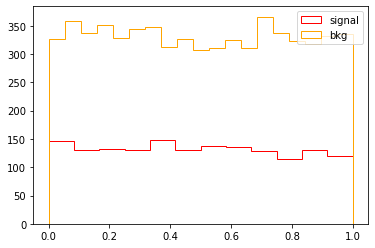

800GeV
lepton2_phi


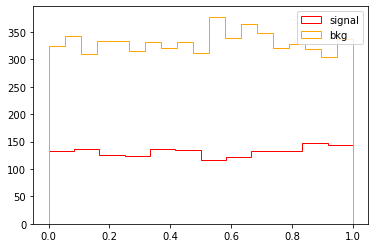

800GeV
lepton3_phi


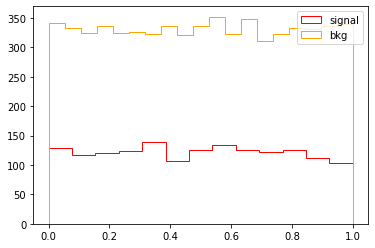

800GeV
MET


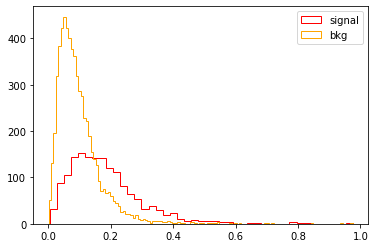

800GeV
MET_phi


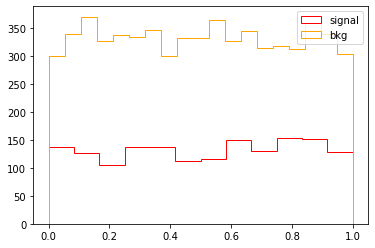

800GeV
lepton1_flavor


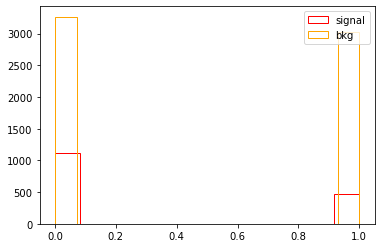

800GeV
lepton2_flavor


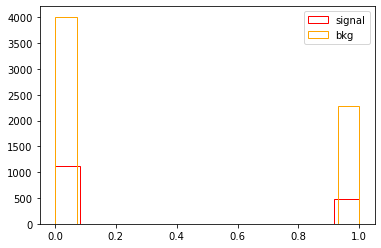

800GeV
lepton3_flavor


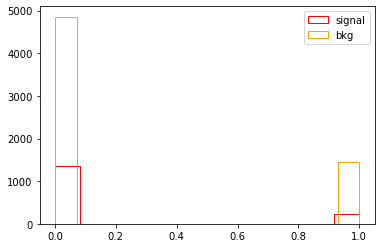

800GeV
lepton1_charge


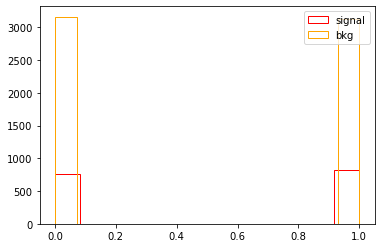

800GeV
lepton2_charge


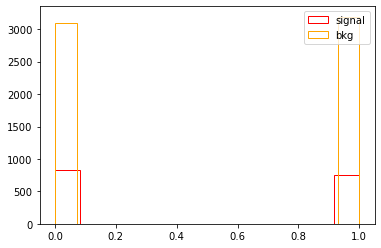

800GeV
lepton3_charge


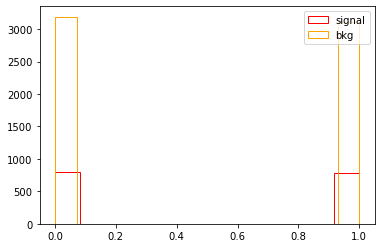

800GeV
signal


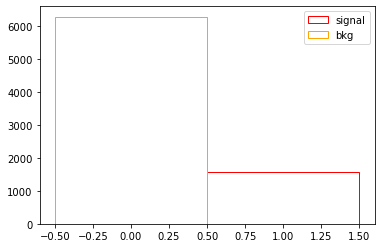

1000GeV
lepton1_pt


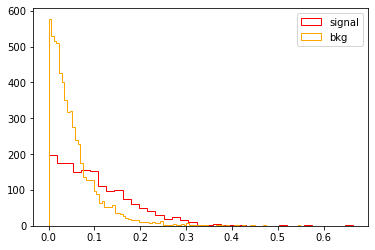

1000GeV
lepton2_pt


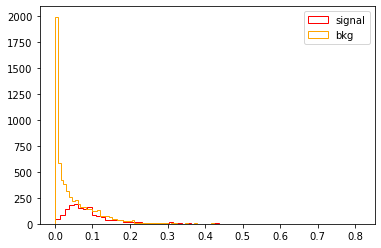

1000GeV
lepton3_pt


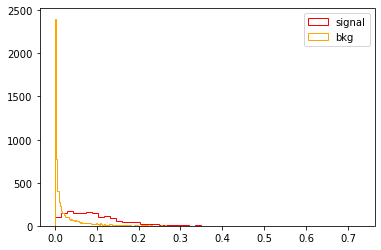

1000GeV
lepton1_eta


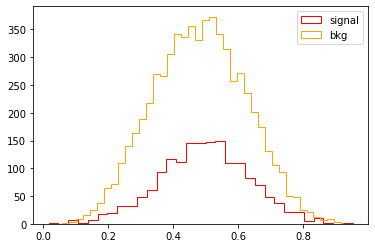

1000GeV
lepton2_eta


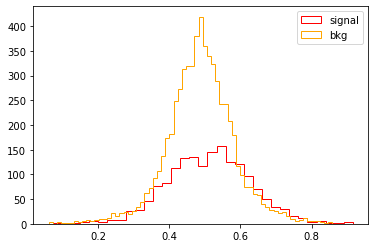

1000GeV
lepton3_eta


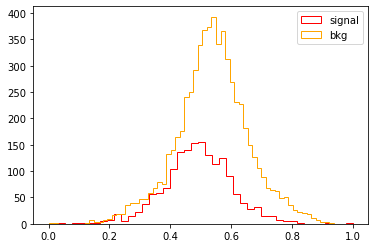

1000GeV
lepton1_phi


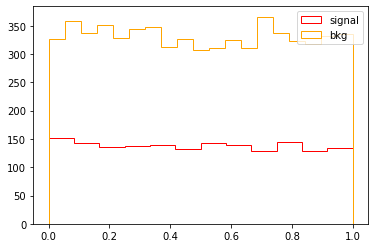

1000GeV
lepton2_phi


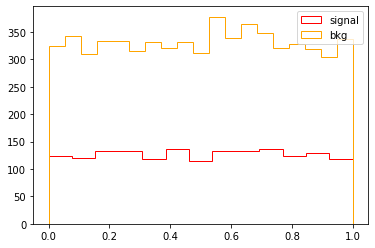

1000GeV
lepton3_phi


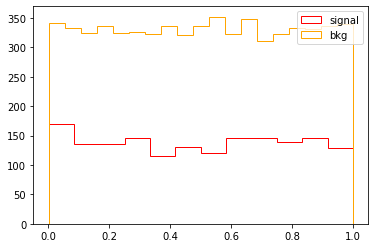

1000GeV
MET


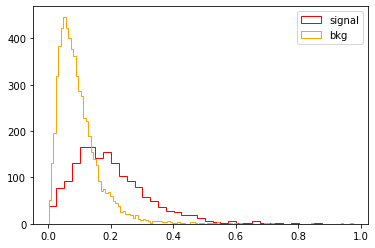

1000GeV
MET_phi


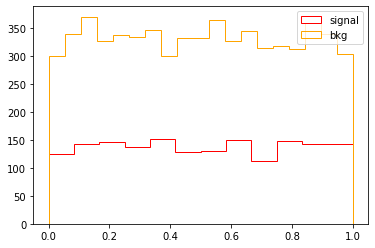

1000GeV
lepton1_flavor


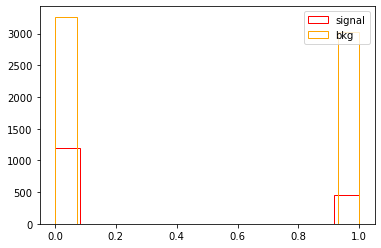

1000GeV
lepton2_flavor


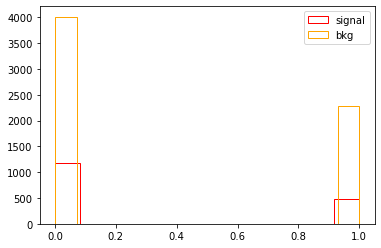

1000GeV
lepton3_flavor


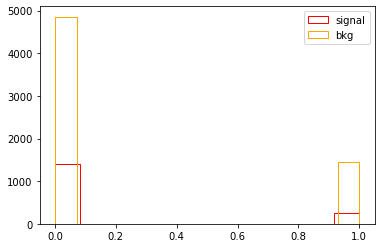

1000GeV
lepton1_charge


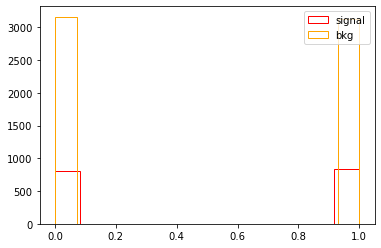

1000GeV
lepton2_charge


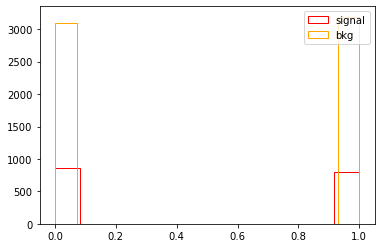

1000GeV
lepton3_charge


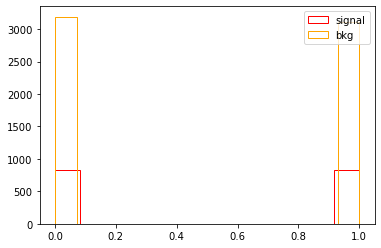

1000GeV
signal


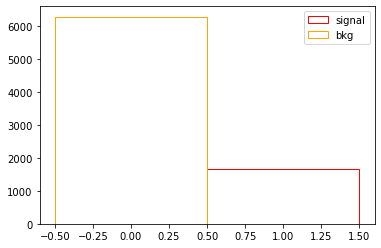

In [25]:
#Plot other 20% of df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[n_sig[sig]:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [26]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(31293, 17)
(7724,)
600GeV
(31513, 17)
(7779,)
700GeV
(31739, 17)
(7835,)
800GeV
(31918, 17)
(7880,)
1000GeV
(32206, 17)
(7952,)


In [27]:
x_train[0]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.006679,0.085787,0.047964,0.328938,0.478940,0.730715,0.630730,0.802057,0.656632,0.022277,0.435481,1.0,0.0,1.0,0.0,0.0,1.0
1,0.017612,0.042245,0.031911,0.391676,0.453861,0.461423,0.318818,0.298694,0.040311,0.025827,0.570160,0.0,0.0,1.0,1.0,0.0,1.0
2,0.023176,0.002394,0.004083,0.469599,0.521450,0.591073,0.304378,0.322371,0.548152,0.059224,0.545450,0.0,1.0,0.0,1.0,1.0,0.0
3,0.033716,0.011787,0.015667,0.500121,0.600719,0.591185,0.604481,0.125250,0.405974,0.221001,0.910171,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040461,0.104157,0.061860,0.502256,0.618946,0.644276,0.595887,0.073381,0.078414,0.092589,0.155796,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31288,0.014254,0.033356,0.001734,0.386654,0.422527,0.467242,0.069304,0.355830,0.387142,0.039604,0.590696,1.0,0.0,0.0,1.0,1.0,0.0
31289,0.217590,0.011599,0.024348,0.345916,0.296533,0.287498,0.694449,0.013812,0.435942,0.242944,0.482873,0.0,0.0,0.0,0.0,1.0,0.0
31290,0.074254,0.005364,0.007616,0.195639,0.414229,0.428934,0.970689,0.448328,0.899806,0.029181,0.062376,1.0,0.0,1.0,1.0,1.0,0.0
31291,0.053444,0.000009,0.000032,0.591564,0.578661,0.749711,0.324958,0.937173,0.211934,0.061037,0.105208,1.0,0.0,0.0,1.0,1.0,0.0


In [28]:
x_train[1]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.012440,0.031254,0.029447,0.543913,0.643505,0.692885,0.509720,0.113099,0.113135,0.081560,0.174016,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001825,0.033060,0.011787,0.178912,0.496524,0.477330,0.356683,0.041388,0.960968,0.267754,0.416800,1.0,1.0,1.0,1.0,0.0,1.0
2,0.022968,0.008027,0.004591,0.535523,0.522815,0.562023,0.711713,0.467996,0.467443,0.030550,0.459945,0.0,1.0,0.0,0.0,0.0,1.0
3,0.017400,0.037097,0.001078,0.529820,0.532224,0.523559,0.193886,0.623453,0.035815,0.038375,0.085720,0.0,0.0,0.0,0.0,1.0,0.0
4,0.024040,0.053022,0.001636,0.464050,0.538021,0.645275,0.181638,0.585910,0.860778,0.083498,0.028232,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31508,0.209814,0.162139,0.069556,0.566053,0.561133,0.534273,0.142165,0.480549,0.834836,0.273690,0.936950,0.0,0.0,0.0,0.0,1.0,0.0
31509,0.087041,0.026565,0.002937,0.664904,0.573897,0.633530,0.080063,0.436497,0.250219,0.082322,0.897524,0.0,1.0,0.0,1.0,1.0,0.0
31510,0.068662,0.026772,0.017405,0.377363,0.511116,0.477551,0.765590,0.305756,0.016489,0.230133,0.784003,1.0,0.0,1.0,0.0,0.0,1.0
31511,0.021571,0.108561,0.001209,0.618393,0.536336,0.546126,0.837821,0.526738,0.935528,0.061172,0.418448,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
x_train[2]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.130584,0.038759,0.105694,0.424422,0.352416,0.460293,0.140366,0.751732,0.204673,0.140390,0.920655,0.0,0.0,0.0,1.0,1.0,0.0
1,0.018463,0.000319,0.000660,0.410075,0.407904,0.472522,0.315806,0.318412,0.303060,0.059717,0.925738,0.0,0.0,0.0,1.0,0.0,1.0
2,0.113582,0.194397,0.003007,0.537480,0.500900,0.504526,0.116285,0.472285,0.586128,0.108147,0.455729,0.0,1.0,0.0,0.0,1.0,1.0
3,0.072906,0.009329,0.002431,0.777846,0.584654,0.728545,0.736593,0.347303,0.992535,0.045763,0.598073,1.0,0.0,0.0,1.0,1.0,0.0
4,0.169605,0.264844,0.009176,0.424173,0.520706,0.385783,0.933066,0.526593,0.094468,0.138555,0.974906,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,0.009409,0.030802,0.020088,0.311871,0.485727,0.520397,0.678121,0.522774,0.318131,0.061664,0.133268,0.0,0.0,0.0,0.0,1.0,1.0
31735,0.048555,0.106531,0.024479,0.551011,0.544112,0.192210,0.489273,0.696566,0.292978,0.329584,0.435460,1.0,1.0,1.0,1.0,0.0,0.0
31736,0.174672,0.132067,0.332179,0.551880,0.507526,0.704323,0.175540,0.114526,0.304561,0.169301,0.802103,1.0,1.0,1.0,0.0,1.0,0.0
31737,0.089330,0.013496,0.006647,0.510611,0.528761,0.561820,0.242335,0.719798,0.193282,0.045458,0.978874,0.0,0.0,0.0,0.0,1.0,1.0


In [30]:
x_train[3]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.004706,0.007978,0.002559,0.439381,0.508032,0.697255,0.670243,0.198496,0.950100,0.084534,0.424790,0.0,0.0,0.0,0.0,1.0,1.0
1,0.038764,0.000337,0.000379,0.352069,0.689460,0.740891,0.423392,0.467141,0.476495,0.046972,0.036896,0.0,0.0,0.0,1.0,0.0,1.0
2,0.006022,0.082531,0.004025,0.466873,0.523702,0.572970,0.607851,0.840117,0.800314,0.074878,0.309274,1.0,0.0,0.0,0.0,1.0,0.0
3,0.095963,0.050638,0.011034,0.409654,0.214872,0.441136,0.485241,0.277286,0.967525,0.097776,0.068332,0.0,1.0,0.0,0.0,1.0,1.0
4,0.150959,0.002318,0.000680,0.388421,0.587185,0.349626,0.085418,0.082356,0.906121,0.059336,0.247109,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31913,0.054250,0.065466,0.102207,0.501812,0.537163,0.568267,0.137669,0.011275,0.626262,0.072302,0.161905,0.0,0.0,1.0,1.0,0.0,0.0
31914,0.050773,0.013188,0.009385,0.536745,0.662521,0.585137,0.511349,0.902628,0.352916,0.238919,0.924715,1.0,0.0,0.0,1.0,0.0,1.0
31915,0.005717,0.108009,0.142696,0.491725,0.486044,0.560132,0.407800,0.009478,0.388930,0.100911,0.723521,0.0,0.0,1.0,0.0,1.0,0.0
31916,0.058506,0.169421,0.002039,0.557412,0.557311,0.549690,0.461665,0.960171,0.436592,0.082531,0.787801,1.0,1.0,0.0,1.0,0.0,0.0


In [31]:
x_train[4]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.004180,0.107155,0.007550,0.436616,0.486972,0.473347,0.819004,0.570357,0.314615,0.095530,0.651719,1.0,1.0,0.0,0.0,1.0,1.0
1,0.166340,0.005867,0.000791,0.429513,0.519448,0.787302,0.957655,0.688034,0.170655,0.017485,0.750274,1.0,1.0,0.0,0.0,1.0,0.0
2,0.158844,0.000458,0.000562,0.690035,0.578978,0.660358,0.501281,0.144633,0.588458,0.066769,0.614986,0.0,0.0,0.0,0.0,1.0,0.0
3,0.033924,0.018120,0.030349,0.422452,0.494154,0.546767,0.865149,0.682365,0.636747,0.096637,0.610350,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000112,0.060253,0.061527,0.512682,0.533713,0.619528,0.272494,0.793783,0.906272,0.092423,0.872657,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,0.079669,0.000235,0.000219,0.719410,0.523881,0.574583,0.927324,0.771820,0.768512,0.118793,0.045097,1.0,0.0,0.0,1.0,1.0,0.0
32202,0.037810,0.018640,0.000803,0.367918,0.504894,0.522503,0.214149,0.576948,0.442132,0.113486,0.374443,1.0,0.0,1.0,1.0,1.0,0.0
32203,0.107890,0.014366,0.008231,0.533447,0.541339,0.294202,0.763715,0.538959,0.249175,0.172262,0.277059,0.0,0.0,0.0,0.0,1.0,0.0
32204,0.130673,0.024919,0.057941,0.479239,0.467804,0.685963,0.495674,0.500370,0.915769,0.096106,0.249908,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"

In [33]:
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

#Defining sequential or linearly stack layers as model
#Adding 5 dense layers to network
model_500 = Sequential()
model_500.add(Dense(17, input_dim=x_train[0].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_500.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [34]:
model_600 = Sequential()
model_600.add(Dense(17, input_dim=x_train[1].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_600.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [35]:
model_700 = Sequential()
model_700.add(Dense(17, input_dim=x_train[2].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_700.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [36]:
model_800 = Sequential()
model_800.add(Dense(17, input_dim=x_train[3].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_800.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [37]:
model_1000 = Sequential()
model_1000.add(Dense(17, input_dim=x_train[4].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_1000.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [38]:
model = [model_500,model_600,model_700,model_800,model_1000]

In [39]:
for mod in range(len(model)):
    model[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [40]:
history = ['history_500','history_600','history_700','history_800','history_1000']
epochs = [40, 80, 60, 50, 50]

In [65]:
for his in range(len(history)):
    print ('\n', mass_points[his] , '\n')
    history[his] = model[his].fit(x_train[his].values,y_train[his].values,validation_data=(x_test[his].values,y_test[his].values), epochs=epochs[his], batch_size=128)


 500GeV 

Epoch 1/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9041 - val_loss: 0.1903 - val_accuracy: 0.9209
Epoch 2/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.9074 - val_loss: 0.2005 - val_accuracy: 0.9108
Epoch 3/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.9064 - val_loss: 0.1897 - val_accuracy: 0.9213
Epoch 4/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.9068 - val_loss: 0.2091 - val_accuracy: 0.9116
Epoch 5/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2202 - accuracy: 0.9062 - val_loss: 0.1940 - val_accuracy: 0.9209
Epoch 6/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9063 - val_loss: 0.1926 - val_accuracy: 0.9179
Epoch 7/40
245/245 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.9061 - val_loss: 0.1944 - val_accuracy: 0.

247/247 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.8767 - val_loss: 0.2674 - val_accuracy: 0.8739
Epoch 19/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.8759 - val_loss: 0.2572 - val_accuracy: 0.8829
Epoch 20/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2767 - accuracy: 0.8753 - val_loss: 0.2623 - val_accuracy: 0.8753
Epoch 21/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.8769 - val_loss: 0.2630 - val_accuracy: 0.8759
Epoch 22/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8774 - val_loss: 0.2596 - val_accuracy: 0.8806
Epoch 23/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.8739 - val_loss: 0.2594 - val_accuracy: 0.8794
Epoch 24/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.8760 - val_loss: 0.2597 - val_accuracy: 0.8783
Epoch 25/80

247/247 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.8807 - val_loss: 0.2546 - val_accuracy: 0.8833
Epoch 76/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.8799 - val_loss: 0.2528 - val_accuracy: 0.8784
Epoch 77/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.8781 - val_loss: 0.2591 - val_accuracy: 0.8812
Epoch 78/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.8788 - val_loss: 0.2547 - val_accuracy: 0.8780
Epoch 79/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2678 - accuracy: 0.8792 - val_loss: 0.2537 - val_accuracy: 0.8828
Epoch 80/80
247/247 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.8811 - val_loss: 0.2507 - val_accuracy: 0.8831

 700GeV 

Epoch 1/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8984 - val_loss: 0.2321 - val_accuracy: 0.9031
E

248/248 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9100 - val_loss: 0.2084 - val_accuracy: 0.9175
Epoch 53/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.9116 - val_loss: 0.1978 - val_accuracy: 0.9213
Epoch 54/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.9104 - val_loss: 0.1985 - val_accuracy: 0.9228
Epoch 55/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.9105 - val_loss: 0.2039 - val_accuracy: 0.9161
Epoch 56/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.9139 - val_loss: 0.2025 - val_accuracy: 0.9160
Epoch 57/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2119 - accuracy: 0.9151 - val_loss: 0.1966 - val_accuracy: 0.9219
Epoch 58/60
248/248 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9130 - val_loss: 0.1949 - val_accuracy: 0.9205
Epoch 59/60

250/250 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.9074 - val_loss: 0.2079 - val_accuracy: 0.9159
Epoch 50/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9067 - val_loss: 0.2031 - val_accuracy: 0.9148

 1000GeV 

Epoch 1/50
252/252 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9128 - val_loss: 0.2017 - val_accuracy: 0.9198
Epoch 2/50
252/252 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9135 - val_loss: 0.2038 - val_accuracy: 0.9194
Epoch 3/50
252/252 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.9136 - val_loss: 0.2207 - val_accuracy: 0.9157
Epoch 4/50
252/252 [==============================] - 1s 3ms/step - loss: 0.2213 - accuracy: 0.9137 - val_loss: 0.2015 - val_accuracy: 0.9223
Epoch 5/50
252/252 [==============================] - 1s 3ms/step - loss: 0.2196 - accuracy: 0.9146 - val_loss: 0.2154 - val_accuracy: 0.9196
Epoc

In [66]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
242/242 [==============================] - 0s 1ms/step - loss: 0.1870 - accuracy: 0.9219
600GeV
244/244 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.8831
700GeV
245/245 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9211
800GeV
247/247 [==============================] - 0s 995us/step - loss: 0.2031 - accuracy: 0.9148
1000GeV
249/249 [==============================] - 0s 971us/step - loss: 0.1991 - accuracy: 0.9212


In [67]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [68]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

500GeV
5710.0
1428.0
[0. 0. 0. ... 0. 0. 0.]


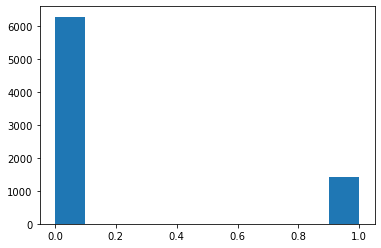

600GeV
5930.0
1483.0
[1. 0. 1. ... 0. 0. 0.]


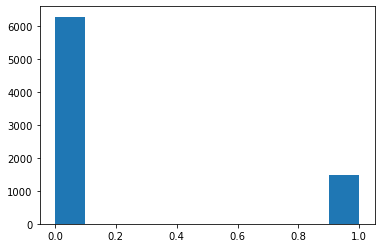

700GeV
6156.0
1539.0
[0. 0. 0. ... 0. 1. 0.]


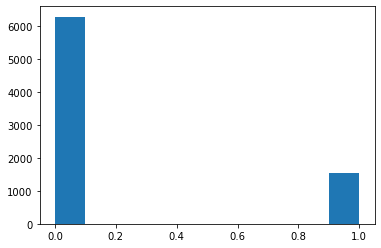

800GeV
6335.0
1584.0
[0. 1. 0. ... 0. 0. 0.]


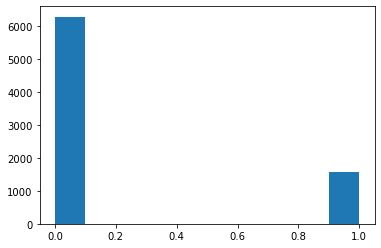

1000GeV
6623.0
1656.0
[0. 0. 0. ... 0. 0. 0.]


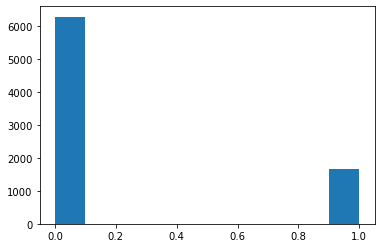

In [69]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    print (y_train[y].sum())
    print (y_test[y].sum())
    
    plt.figure()
    print (y_test[y].values)
    plt.hist(y_test[y])
    plt.show()

In [70]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV
[3.8880192e-09 8.1232190e-04 2.6548133e-10 ... 7.8088045e-04 1.2281830e-04
 6.3860673e-01]


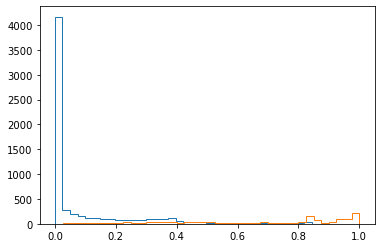

600GeV
[0.68163514 0.07583532 0.49633223 ... 0.27410626 0.22699323 0.00547832]


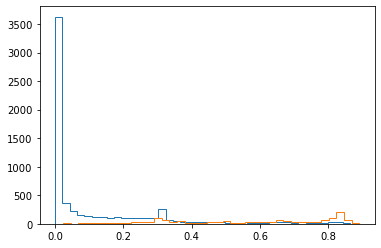

700GeV
[9.08287475e-05 3.57638538e-01 1.21730096e-04 ... 2.01906686e-10
 7.83695221e-01 3.30080986e-02]


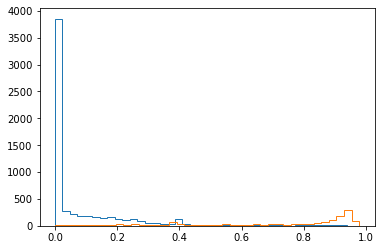

800GeV
[7.60912895e-04 2.76442707e-01 7.31671180e-13 ... 1.05021445e-05
 8.67602229e-03 2.05654851e-06]


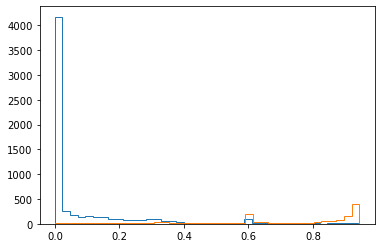

1000GeV
[3.0386311e-01 2.4206638e-03 2.6132357e-01 ... 1.2969971e-02 1.0815866e-06
 3.5313660e-05]


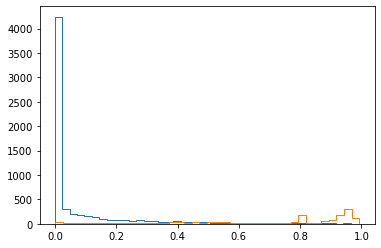

In [71]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

500GeV
[3.8880192e-09 8.1232190e-04 2.6548133e-10 ... 7.8088045e-04 1.2281830e-04
 6.3860673e-01]


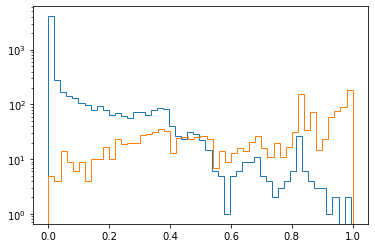

600GeV
[0.68163514 0.07583532 0.49633223 ... 0.27410626 0.22699323 0.00547832]


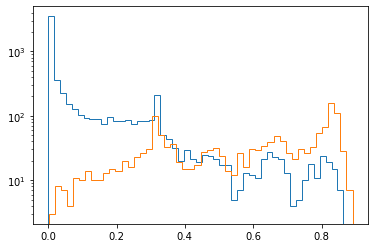

700GeV
[9.08287475e-05 3.57638538e-01 1.21730096e-04 ... 2.01906686e-10
 7.83695221e-01 3.30080986e-02]


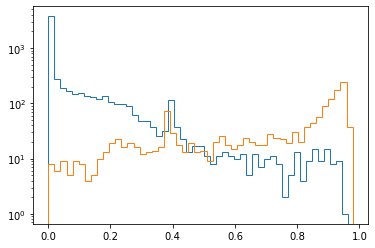

800GeV
[7.60912895e-04 2.76442707e-01 7.31671180e-13 ... 1.05021445e-05
 8.67602229e-03 2.05654851e-06]


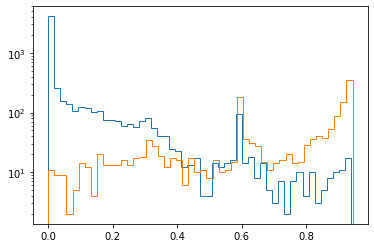

1000GeV
[3.0386311e-01 2.4206638e-03 2.6132357e-01 ... 1.2969971e-02 1.0815866e-06
 3.5313660e-05]


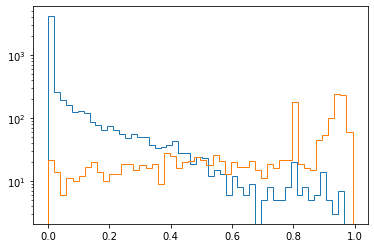

In [72]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()

In [73]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [9999,10000,9998,10000,9999]
nevents_sig_passed = [7138,7413,7695,7919,8279]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (31879/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

42781055.222508274
855
468
268
158
60


500GeV
[3.8880192e-09 8.1232190e-04 2.6548133e-10 ... 7.8088045e-04 1.2281830e-04
 6.3860673e-01]


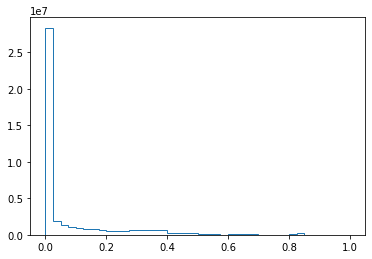

600GeV
[0.68163514 0.07583532 0.49633223 ... 0.27410626 0.22699323 0.00547832]


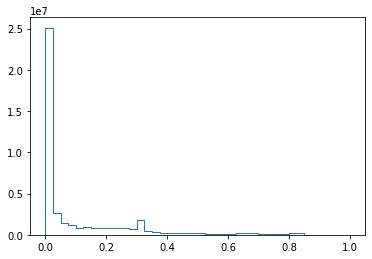

700GeV
[9.08287475e-05 3.57638538e-01 1.21730096e-04 ... 2.01906686e-10
 7.83695221e-01 3.30080986e-02]


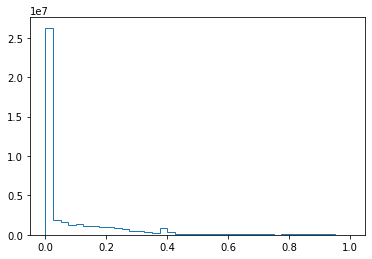

800GeV
[7.60912895e-04 2.76442707e-01 7.31671180e-13 ... 1.05021445e-05
 8.67602229e-03 2.05654851e-06]


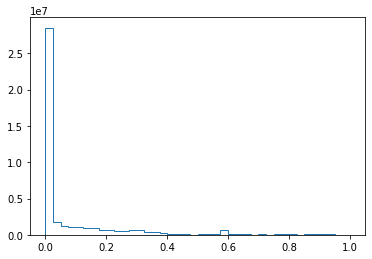

1000GeV
[3.0386311e-01 2.4206638e-03 2.6132357e-01 ... 1.2969971e-02 1.0815866e-06
 3.5313660e-05]


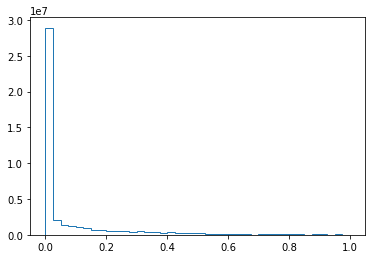

In [74]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

500GeV
[3.8880192e-09 8.1232190e-04 2.6548133e-10 ... 7.8088045e-04 1.2281830e-04
 6.3860673e-01]


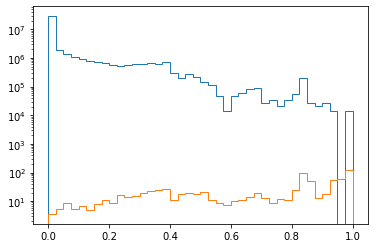

600GeV
[0.68163514 0.07583532 0.49633223 ... 0.27410626 0.22699323 0.00547832]


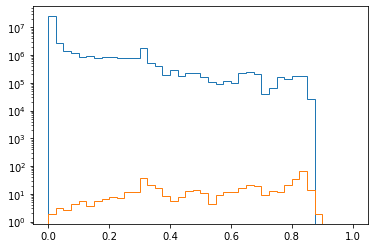

700GeV
[9.08287475e-05 3.57638538e-01 1.21730096e-04 ... 2.01906686e-10
 7.83695221e-01 3.30080986e-02]


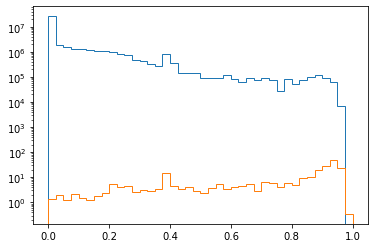

800GeV
[7.60912895e-04 2.76442707e-01 7.31671180e-13 ... 1.05021445e-05
 8.67602229e-03 2.05654851e-06]


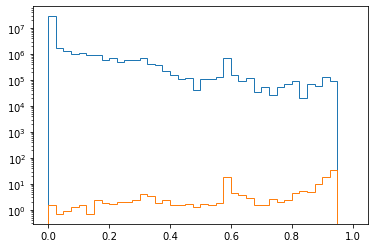

1000GeV
[3.0386311e-01 2.4206638e-03 2.6132357e-01 ... 1.2969971e-02 1.0815866e-06
 3.5313660e-05]


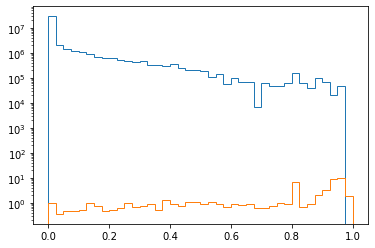

In [75]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [76]:
'''for u in history[0].history:
    plt.figure()
    plt.plot(history[0].history[u])
    plt.title(u)
plt.show()'''

'for u in history[0].history:\n    plt.figure()\n    plt.plot(history[0].history[u])\n    plt.title(u)\nplt.show()'

In [77]:
'''for u in history[1].history:
    plt.figure()
    plt.plot(history[1].history[u])
    plt.title(u)
plt.show()'''

'for u in history[1].history:\n    plt.figure()\n    plt.plot(history[1].history[u])\n    plt.title(u)\nplt.show()'

In [78]:
'''for u in history[2].history:
    plt.figure()
    plt.plot(history[2].history[u])
    plt.title(u)
plt.show()'''

'for u in history[2].history:\n    plt.figure()\n    plt.plot(history[2].history[u])\n    plt.title(u)\nplt.show()'

In [79]:
'''for u in history[3].history:
    plt.figure()
    plt.plot(history[3].history[u])
    plt.title(u)
plt.show()'''

'for u in history[3].history:\n    plt.figure()\n    plt.plot(history[3].history[u])\n    plt.title(u)\nplt.show()'

In [80]:
'''for u in history[4].history:
    plt.figure()
    plt.plot(history[4].history[u])
    plt.title(u)
plt.plot(history[4].history['accuracy'])
plt.plot(history[4].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()'''

"for u in history[4].history:\n    plt.figure()\n    plt.plot(history[4].history[u])\n    plt.title(u)\nplt.plot(history[4].history['accuracy'])\nplt.plot(history[4].history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.show()"

In [81]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [82]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])

    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

500GeV


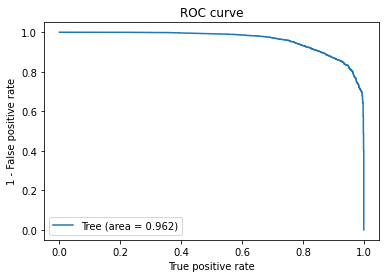

600GeV


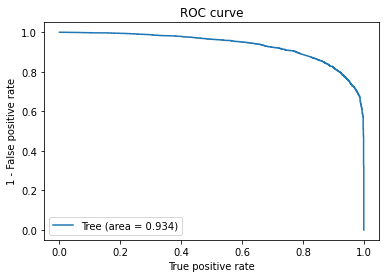

700GeV


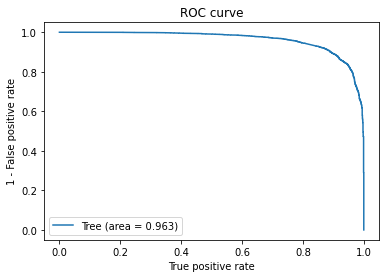

800GeV


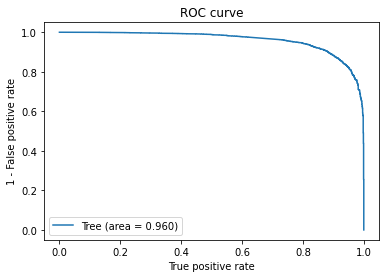

1000GeV


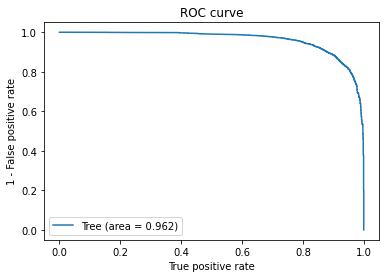

In [83]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

<ipython-input-84-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


500GeV


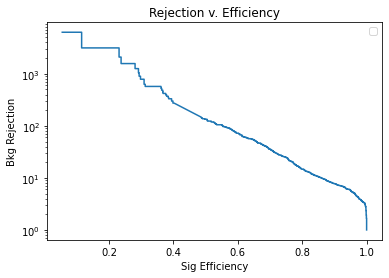

<ipython-input-84-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


600GeV


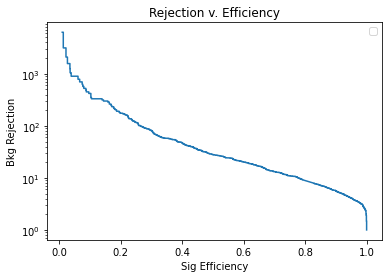

<ipython-input-84-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


700GeV


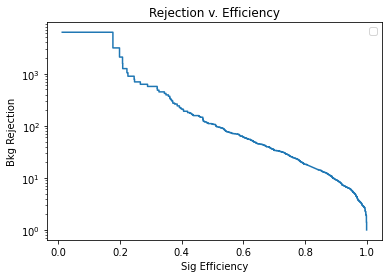

<ipython-input-84-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


800GeV


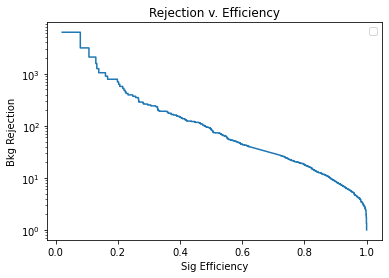

<ipython-input-84-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


1000GeV


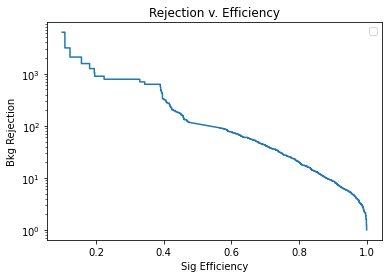

In [84]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency')
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [85]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

ROC curve


,mass_{H+},area
0,500GeV,0.962023
1,600GeV,0.934383
2,700GeV,0.962839
3,800GeV,0.960349
4,1000GeV,0.962195


In [86]:
print ('rejection vs efficiency')
area_table_rve = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model_rve})
area_table_rve

rejection vs efficiency


,mass_{H+},area
0,500GeV,auc_model_rve_500
1,600GeV,auc_model_rve_600
2,700GeV,auc_model_rve_700
3,800GeV,auc_model_rve_800
4,1000GeV,auc_model_rve_1000


In [87]:
#end of model

In [64]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [ ]:
test_array

In [ ]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_y_test

In [ ]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

In [ ]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
#end test predict for 50:50 test:train

In [ ]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [ ]:
y_test

In [ ]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

In [ ]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [ ]:
tree_2.fit(x_train,y_train)

In [ ]:
tree_2.score(x_test,y_test)

In [ ]:
#End of DT - Begin new model1 

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

In [ ]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

In [ ]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

In [ ]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

In [ ]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

In [ ]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

In [ ]:
y_test

In [ ]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()